<center><h1>DSCI-552 HW_4</h1></center>
<br>
<center><font size="4">Name: Jiade Song GitHubID: JiadeSong USCID: 9019610285 </font></center>

～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～
～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～
Below are HW3
<center><font size="4">1. Time Series Classification Part 1: Feature Creation/Extraction</font></center>

In [1]:
import pandas as pd
import numpy as np
import glob
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import scipy.stats as stat
from sklearn.linear_model import LogisticRegressionCV

In [2]:
df_var = []
path_end = ['bending1','bending2','cycling','lying','sitting','standing','walking']
path_start = r'../../data/AReM/'

for i in path_end:
    path_total = path_start+i
    all_data_files = glob.glob(path_total + "/*.csv")
    for f in all_data_files:
        df_var.append(i+ '_' + f[(f.find('set')+3):-4])
        locals()[i+ '_' + f[(f.find('set')+3):-4]] = pd.read_csv(f,header=4).rename(columns \
                                                                = {'# Columns: time':'time'})
# Manually cleaned dataset9 and 14 by hand.              
column_list = ["time", "avg_rss12", "var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"," "]
bending2_4_0 = pd.read_csv('../../data/AReM/bending2/dataset4.csv',delimiter=' ', skiprows=5, header=None)
bending2_4_0.columns=column_list
bending2_4 = bending2_4_0[column_list[0:7]]

###    (B)

In [3]:
train_dataset = []
test_dataset = []
train_y = []
test_y =[]
for i in df_var:
#      print(i[(i.find('_')+1):])
    if i[:(i.find('_'))] in ['bending1','bending2']:
        if int(i[(i.find('_')+1):]) <= 2:
            test_dataset.append(i)
            test_y.append(i[:(i.find('ing')+3)])
        else:
            train_dataset.append(i)
            train_y.append(i[:(i.find('ing')+3)])
    else:
        if int(i[(i.find('_')+1):]) <= 3:
            test_dataset.append(i)
            test_y.append(i[:(i.find('ing')+3)])
        else:
            train_dataset.append(i)
            train_y.append(i[:(i.find('ing')+3)])
            
train_table = pd.DataFrame(columns=['dataset_name','y'])
train_table['dataset_name'] = train_dataset
train_table['y'] = train_y

test_table = pd.DataFrame(columns=['dataset_name','y'])
test_table['dataset_name'] = test_dataset
test_table['y'] = test_y

test_table

dataset_name         y
0    bending1_1   bending
1    bending1_2   bending
2    bending2_1   bending
3    bending2_2   bending
4     cycling_1   cycling
5     cycling_2   cycling
6     cycling_3   cycling
7       lying_1     lying
8       lying_2     lying
9       lying_3     lying
10    sitting_1   sitting
11    sitting_2   sitting
12    sitting_3   sitting
13   standing_1  standing
14   standing_2  standing
15   standing_3  standing
16    walking_1   walking
17    walking_2   walking
18    walking_3   walking

### C (i)

    Answer: Min, Max, Std, Mean, Peak, Skewness, Kurtosis, Frequency, Seasonality. 

https://www.researchgate.net/publication/312184476_Clustering_algorithm-based_fault_diagnosis/figures?lo=1

### C (ii)

In [4]:
New_dataset_col_name = ['dataset_name']
feature_name = ['min','max','mean','median','std','1st_Quartile','3rd_Quartile']
for i in column_list[1:7]:
    for j in feature_name:
        New_dataset_col_name.append(j+'_'+i)

In [5]:
New_dataset = pd.DataFrame(columns=New_dataset_col_name)

for i in df_var:
    row=[i]
    for j in column_list[1:7]:
        this_col = locals()[i][j]
        features = [min(this_col), max(this_col),this_col.mean(),this_col.median()\
                   ,this_col.std(),np.percentile(this_col, 25),np.percentile(this_col, 75)]
        [row.append(n) for n in features]
    df_length = len(New_dataset)
    New_dataset.loc[df_length] = row

In [6]:
New_dataset

dataset_name  min_avg_rss12  max_avg_rss12  mean_avg_rss12  \
0    bending1_7          36.25          48.00       43.969125   
1    bending1_6          37.00          48.00       43.454958   
2    bending1_4          33.00          47.75       42.179813   
3    bending1_5          33.00          45.75       41.678063   
4    bending1_1          37.25          45.00       40.624792   
..          ...            ...            ...             ...   
83   walking_12          19.75          45.50       34.322750   
84   walking_15          19.25          44.00       34.473188   
85   walking_14          23.50          46.25       34.873229   
86    walking_8          18.33          45.75       34.599875   
87    walking_9          15.50          43.67       34.225875   

    median_avg_rss12  std_avg_rss12  1st_Quartile_avg_rss12  \
0             44.500       1.618364                   43.31   
1             43.250       1.386098                   42.50   
2             43.500       3.670666                   39.15   
3             41.750       2.243490                   41.33   
4             40.500       1.476967                   39.25   
..               ...            ...                     ...   
83            35.250       4.752477                   31.00   
84            35.000       4.796705                   31.25   
85            35.250       4.531720                   31.75   
86            35.125       4.731790                   31.50   
87            34.750       4.441798                   31.25   

    3rd_Quartile_avg_rss12  min_var_rss12  max_var_rss12  ...  std_avg_rss23  \
0                    44.67            0.0           1.50  ...       3.318301   
1                    45.00            0.0           1.58  ...       2.488862   
2                    45.00            0.0           3.00  ...       3.849448   
3                    42.75            0.0           2.83  ...       2.411026   
4                    42.00            0.0           1.30  ...       2.188449   
..                     ...            ...            ...  ...            ...   
83                   38.00            0.0          13.47  ...       3.119856   
84                   38.00            0.0          13.86  ...       3.156320   
85                   38.25            0.0          14.82  ...       3.131076   
86                   38.00            0.0          15.37  ...       2.905688   
87                   37.25            0.0          17.24  ...       2.992920   

    1st_Quartile_avg_rss23  3rd_Quartile_avg_rss23  min_var_rss23  \
0                  20.5000                   23.75           0.00   
1                  22.2500                   24.00           0.00   
2                  30.4575                   36.33           0.00   
3                  28.4575                   31.25           0.00   
4                  33.0000                   36.00           0.00   
..                     ...                     ...            ...   
83                 13.5000                   17.75           0.00   
84                 13.7300                   17.75           0.43   
85                 13.7500                   18.00           0.00   
86                 14.0000                   18.25           0.00   
87                 14.3300                   18.25           0.00   

    max_var_rss23  mean_var_rss23  median_var_rss23  std_var_rss23  \
0            2.96        0.555313             0.490       0.487826   
1            5.26        0.679646             0.500       0.622534   
2            2.18        0.613521             0.500       0.524317   
3            1.79        0.383292             0.430       0.389164   
4            1.92        0.570583             0.430       0.582915   
..            ...             ...               ...            ...   
83           9.67        3.432562             3.200       1.732727   
84           9.00        3.340458             3.090       1.699114   
85           9.51        3.424646            

### C (iii)
    Std of each time-domain features.

In [7]:
New_dataset_std = []
for i in New_dataset_col_name[1:]:
    New_dataset_std.append(round(New_dataset[i].std(),2))
New_dataset_std_df = pd.DataFrame(columns=New_dataset_col_name[1:])
New_dataset_std_df.loc[0] = New_dataset_std
New_dataset_std_df.T
# values represent the stds.

0
min_avg_rss12           9.57
max_avg_rss12           4.39
mean_avg_rss12          5.34
median_avg_rss12        5.44
std_avg_rss12           1.77
1st_Quartile_avg_rss12  6.15
3rd_Quartile_avg_rss12  5.14
min_var_rss12           0.00
max_var_rss12           5.06
mean_var_rss12          1.57
median_var_rss12        1.41
std_var_rss12           0.88
1st_Quartile_var_rss12  0.95
3rd_Quartile_var_rss12  2.13
min_avg_rss13           2.96
max_avg_rss13           4.88
mean_avg_rss13          4.01
median_avg_rss13        4.04
std_avg_rss13           0.95
1st_Quartile_avg_rss13  4.22
3rd_Quartile_avg_rss13  4.17
min_var_rss13           0.00
max_var_rss13           2.18
mean_var_rss13          1.17
median_var_rss13        1.15
std_var_rss13           0.46
1st_Quartile_var_rss13  0.84
3rd_Quartile_var_rss13  1.55
min_avg_rss23           6.12
max_avg_rss23           5.74
mean_avg_rss23          5.68
median_avg_rss23        5.81
std_avg_rss23           1.02
1st_Quartile_avg_rss23  6.10
3rd_Quartile_avg_rss23  5.53
min_var_rss23           0.05
max_var_rss23           2.52
mean_var_rss23          1.15
median_var_rss23        1.09
std_var_rss23           0.52
1st_Quartile_var_rss23  0.76
3rd_Quartile_var_rss23  1.52

    Bootstrap std CI of each time-domain features.

In [8]:
New_dataset_std_bs_lower = []
New_dataset_std_bs_upper = []
for i in New_dataset_col_name[1:]:
    bs_results = bs.bootstrap(np.array(New_dataset[i]), stat_func=bs_stats.std, alpha=0.1)
    New_dataset_std_bs_lower.append(round(bs_results.lower_bound,3))
    New_dataset_std_bs_upper.append(round(bs_results.upper_bound,3))
New_dataset_std_bs_df = pd.DataFrame(columns=New_dataset_col_name[1:])
New_dataset_std_bs_df.loc[0] = New_dataset_std_bs_lower
New_dataset_std_bs_df.loc[1] = New_dataset_std_bs_upper
New_dataset_std_bs_df.T
# "0" column represent CI lower bound and "1" column represent CI upper bound.

0       1
min_avg_rss12           8.283  10.827
max_avg_rss12           3.484   5.404
mean_avg_rss12          4.768   5.921
median_avg_rss12        4.848   6.051
std_avg_rss12           1.584   1.963
1st_Quartile_avg_rss12  5.621   6.690
3rd_Quartile_avg_rss12  4.402   5.918
min_var_rss12           0.000   0.000
max_var_rss12           4.692   5.469
mean_var_rss12          1.434   1.739
median_var_rss12        1.276   1.577
std_var_rss12           0.822   0.960
1st_Quartile_var_rss12  0.853   1.057
3rd_Quartile_var_rss12  1.943   2.338
min_avg_rss13           2.788   3.137
max_avg_rss13           4.267   5.535
mean_avg_rss13          3.489   4.577
median_avg_rss13        3.506   4.621
std_avg_rss13           0.766   1.124
1st_Quartile_avg_rss13  3.711   4.783
3rd_Quartile_avg_rss13  3.636   4.769
min_var_rss13           0.000   0.000
max_var_rss13           1.998   2.382
mean_var_rss13          1.105   1.250
median_var_rss13        1.084   1.230
std_var_rss13           0.428   0.492
1st_Quartile_var_rss13  0.792   0.910
3rd_Quartile_var_rss13  1.470   1.664
min_avg_rss23           4.745   7.760
max_avg_rss23           4.896   6.703
mean_avg_rss23          4.612   6.902
median_avg_rss23        4.695   7.053
std_avg_rss23           0.827   1.233
1st_Quartile_avg_rss23  4.937   7.354
3rd_Quartile_avg_rss23  4.504   6.654
min_var_rss23           0.013   0.091
max_var_rss23           2.266   2.771
mean_var_rss23          1.089   1.241
median_var_rss23        1.020   1.169
std_var_rss23           0.487   0.553
1st_Quartile_var_rss23  0.704   0.824
3rd_Quartile_var_rss23  1.438   1.634

### C (iv)

In [9]:
New_dataset_w_y = New_dataset.copy()
New_dataset_w_y['y'] = np.nan
for i in range(len(New_dataset_w_y)):
    New_dataset_w_y['y'][i] = New_dataset_w_y['dataset_name'][i][:(New_dataset_w_y['dataset_name'][i].find('_')-1)]
New_dataset_w_y

<ipython-input-9-079a48d34a8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_dataset_w_y['y'][i] = New_dataset_w_y['dataset_name'][i][:(New_dataset_w_y['dataset_name'][i].find('_')-1)]
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


dataset_name  min_avg_rss12  max_avg_rss12  mean_avg_rss12  \
0    bending1_7          36.25          48.00       43.969125   
1    bending1_6          37.00          48.00       43.454958   
2    bending1_4          33.00          47.75       42.179813   
3    bending1_5          33.00          45.75       41.678063   
4    bending1_1          37.25          45.00       40.624792   
..          ...            ...            ...             ...   
83   walking_12          19.75          45.50       34.322750   
84   walking_15          19.25          44.00       34.473188   
85   walking_14          23.50          46.25       34.873229   
86    walking_8          18.33          45.75       34.599875   
87    walking_9          15.50          43.67       34.225875   

    median_avg_rss12  std_avg_rss12  1st_Quartile_avg_rss12  \
0             44.500       1.618364                   43.31   
1             43.250       1.386098                   42.50   
2             43.500       3.670666                   39.15   
3             41.750       2.243490                   41.33   
4             40.500       1.476967                   39.25   
..               ...            ...                     ...   
83            35.250       4.752477                   31.00   
84            35.000       4.796705                   31.25   
85            35.250       4.531720                   31.75   
86            35.125       4.731790                   31.50   
87            34.750       4.441798                   31.25   

    3rd_Quartile_avg_rss12  min_var_rss12  max_var_rss12  ...  \
0                    44.67            0.0           1.50  ...   
1                    45.00            0.0           1.58  ...   
2                    45.00            0.0           3.00  ...   
3                    42.75            0.0           2.83  ...   
4                    42.00            0.0           1.30  ...   
..                     ...            ...            ...  ...   
83                   38.00            0.0          13.47  ...   
84                   38.00            0.0          13.86  ...   
85                   38.25            0.0          14.82  ...   
86                   38.00            0.0          15.37  ...   
87                   37.25            0.0          17.24  ...   

    1st_Quartile_avg_rss23  3rd_Quartile_avg_rss23  min_var_rss23  \
0                  20.5000                   23.75           0.00   
1                  22.2500                   24.00           0.00   
2                  30.4575                   36.33           0.00   
3                  28.4575                   31.25           0.00   
4                  33.0000                   36.00           0.00   
..                     ...                     ...            ...   
83                 13.5000                   17.75           0.00   
84                 13.7300                   17.75           0.43   
85                 13.7500                   18.00           0.00   
86                 14.0000                   18.25           0.00   
87                 14.3300                   18.25           0.00   

    max_var_rss23  mean_var_rss23  median_var_rss23  std_var_rss23  \
0            2.96        0.555313             0.490       0.487826   
1            5.26        0.679646             0.500       0.622534   
2            2.18        0.613521             0.500       0.524317   
3            1.79        0.383292             0.430       0.389164   
4            1.92        0.570583             0.430       0.582915   
..            ...             ...               ...            ...   
83           9.67        3.432562             3.200       1.732727   
84           9.00        3.340458             3.090       1.699114   
85           9.51        3.424646             3.270       1.690960   
86           8.86        3.289542             3.015       1.680170   
87           9.42        3.479542             3.270       1.761146   

    1st_Quarti

/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/seabor

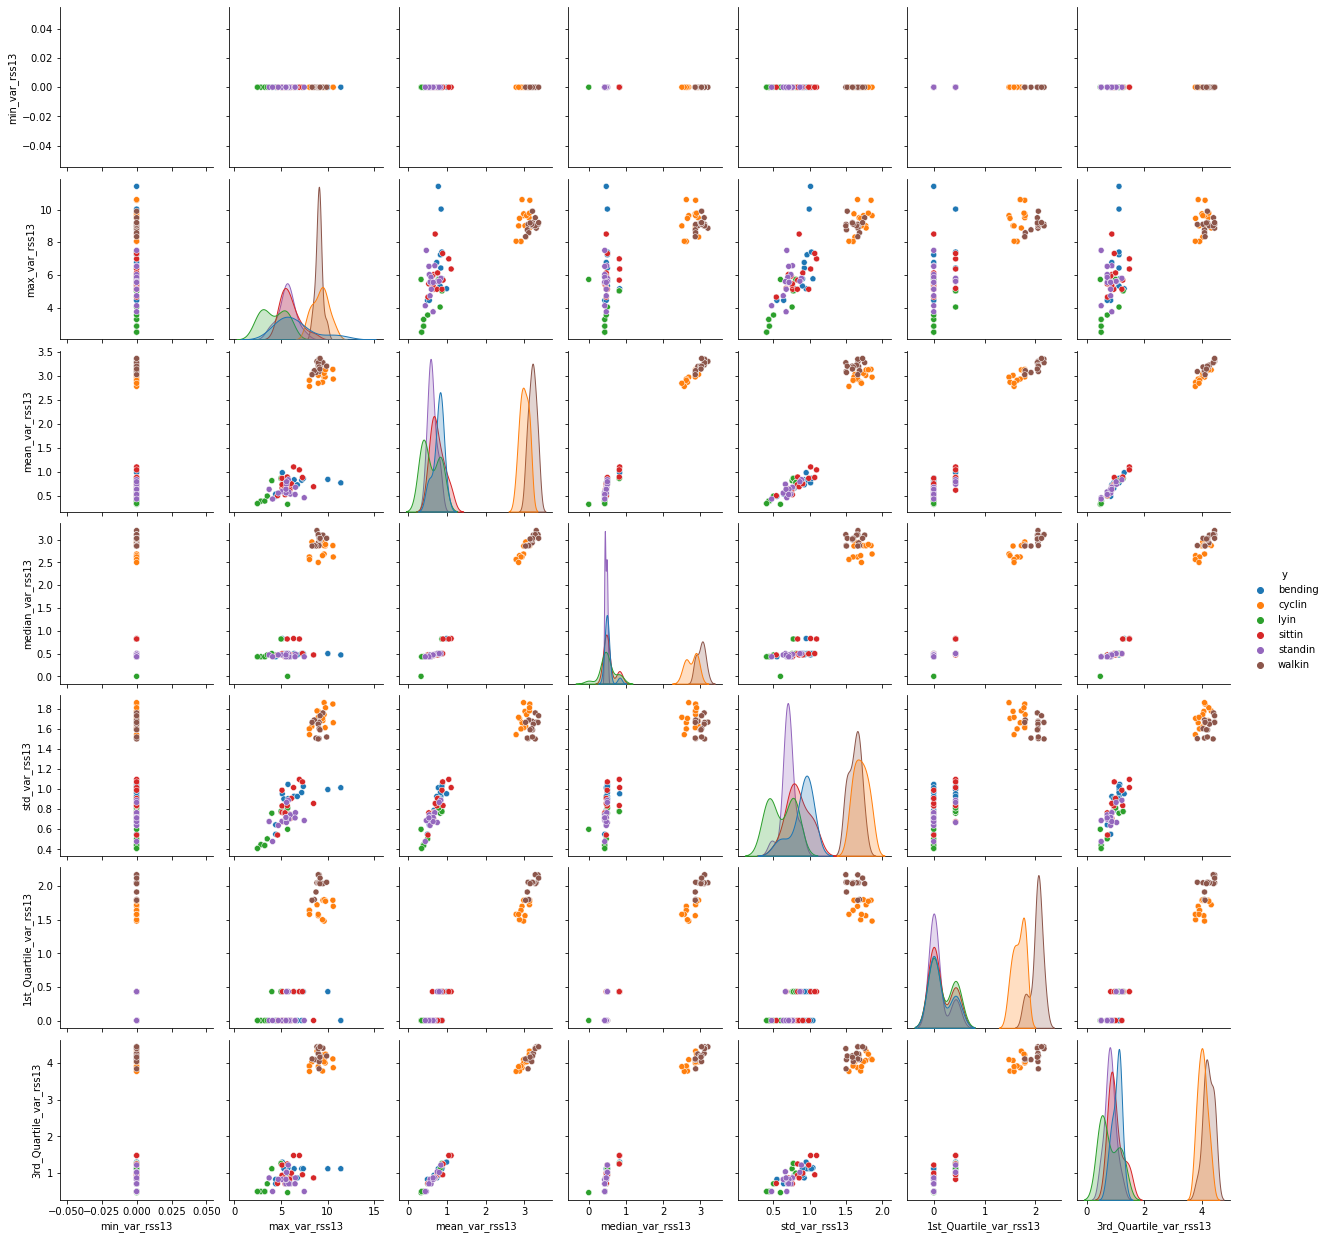

In [10]:
sns.pairplot(New_dataset_w_y,vars=New_dataset_w_y.columns[22:29], hue='y');

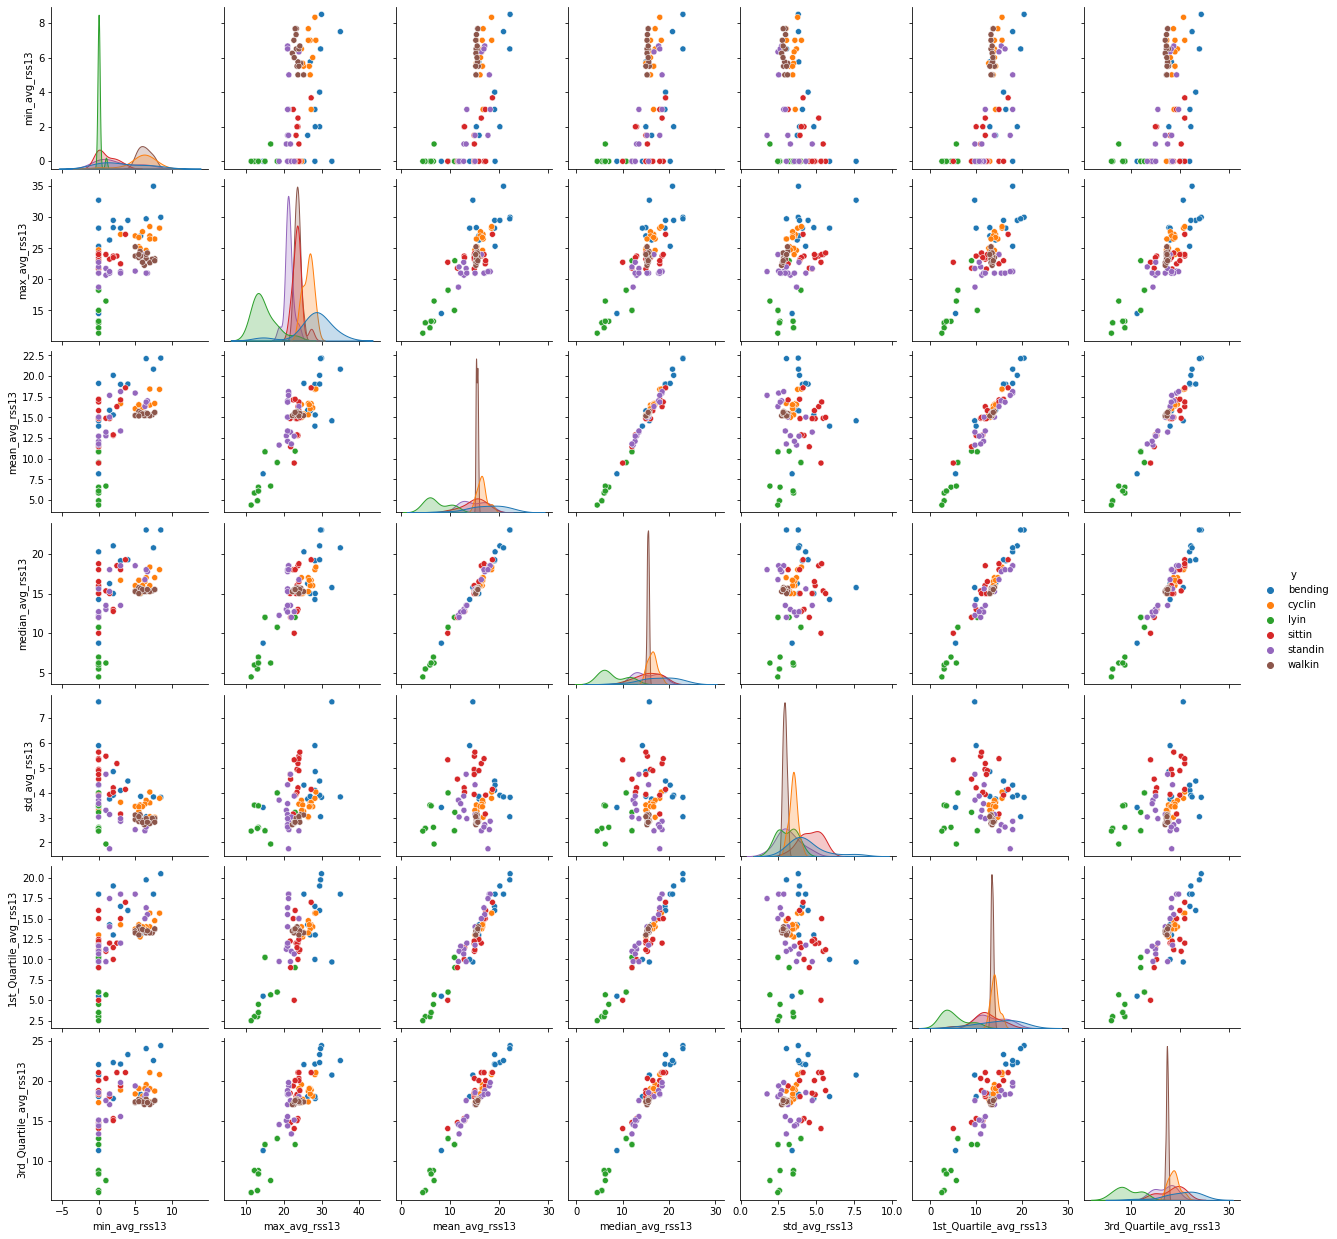

In [11]:
sns.pairplot(New_dataset_w_y,vars=New_dataset_w_y.columns[15:22], hue='y');

        Answer: These two plots above shows two columns of raw datasets from original files and their 
                time-domain features (Other 4 columns have a similar performance as these two, so I will use 
                them as an example.). We could know from the plots that the mean, median, 1st quartile and 
                3rd quartile are very linearly related, so it is reasonable to chose one of it. I would 
                chose Mean. 
                
                For the feature Min, it has a lot of points of zero, which is a nutural character when 
                recording time series, so the starting points of zero don't mean much when classifing. 
                
                As a result, I would select Max, Mean and STD as the time domin features. 

Above are HW3

～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～
～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～

Below are HW4

<center><font size="4">2. Time Series Classification Part 2: Binary and Multiclass Classification</font></center>

### (a) 

### i.

In [12]:
Bi_New_dataset = New_dataset.copy()
Bi_New_dataset['y'] = np.nan
for i in range(len(Bi_New_dataset)):
    s = Bi_New_dataset['dataset_name'][i][:(Bi_New_dataset['dataset_name'][i].find('_'))]
    if s in ['bending1','bending2']:
        Bi_New_dataset['y'][i] = 'bending'
    else:
        Bi_New_dataset['y'][i] = 'other'
Bi_New_dataset

<ipython-input-12-28667d9ae79e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bi_New_dataset['y'][i] = 'bending'
/Users/jiadesong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-12-28667d9ae79e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bi_New_dataset['y'][i] = 'other'


dataset_name  min_avg_rss12  max_avg_rss12  mean_avg_rss12  \
0    bending1_7          36.25          48.00       43.969125   
1    bending1_6          37.00          48.00       43.454958   
2    bending1_4          33.00          47.75       42.179813   
3    bending1_5          33.00          45.75       41.678063   
4    bending1_1          37.25          45.00       40.624792   
..          ...            ...            ...             ...   
83   walking_12          19.75          45.50       34.322750   
84   walking_15          19.25          44.00       34.473188   
85   walking_14          23.50          46.25       34.873229   
86    walking_8          18.33          45.75       34.599875   
87    walking_9          15.50          43.67       34.225875   

    median_avg_rss12  std_avg_rss12  1st_Quartile_avg_rss12  \
0             44.500       1.618364                   43.31   
1             43.250       1.386098                   42.50   
2             43.500       3.670666                   39.15   
3             41.750       2.243490                   41.33   
4             40.500       1.476967                   39.25   
..               ...            ...                     ...   
83            35.250       4.752477                   31.00   
84            35.000       4.796705                   31.25   
85            35.250       4.531720                   31.75   
86            35.125       4.731790                   31.50   
87            34.750       4.441798                   31.25   

    3rd_Quartile_avg_rss12  min_var_rss12  max_var_rss12  ...  \
0                    44.67            0.0           1.50  ...   
1                    45.00            0.0           1.58  ...   
2                    45.00            0.0           3.00  ...   
3                    42.75            0.0           2.83  ...   
4                    42.00            0.0           1.30  ...   
..                     ...            ...            ...  ...   
83                   38.00            0.0          13.47  ...   
84                   38.00            0.0          13.86  ...   
85                   38.25            0.0          14.82  ...   
86                   38.00            0.0          15.37  ...   
87                   37.25            0.0          17.24  ...   

    1st_Quartile_avg_rss23  3rd_Quartile_avg_rss23  min_var_rss23  \
0                  20.5000                   23.75           0.00   
1                  22.2500                   24.00           0.00   
2                  30.4575                   36.33           0.00   
3                  28.4575                   31.25           0.00   
4                  33.0000                   36.00           0.00   
..                     ...                     ...            ...   
83                 13.5000                   17.75           0.00   
84                 13.7300                   17.75           0.43   
85                 13.7500                   18.00           0.00   
86                 14.0000                   18.25           0.00   
87                 14.3300                   18.25           0.00   

    max_var_rss23  mean_var_rss23  median_var_rss23  std_var_rss23  \
0            2.96        0.555313             0.490       0.487826   
1            5.26        0.679646             0.500       0.622534   
2            2.18        0.613521             0.500       0.524317   
3            1.79        0.383292             0.430       0.389164   
4            1.92        0.570583             0.430       0.582915   
..            ...             ...               ...            ...   
83           9.67        3.432562             3.200       1.732727   
84           9.00        3.340458             3.090       1.699114   
85           9.51        3.424646             3.270       1.690960   
86           8.86        3.289542             3.015       1.680170   
87           9.42        3.479542             3.270       1.761146   

    1st_Quarti

In [13]:
time_series_number = ["avg_rss12", "var_rss12","var_rss23"]
feature_extracted = ['max','mean','std']
# Max, Mean and STD
fea_ex = pd.DataFrame()
for i in time_series_number:
    for j in feature_extracted:
        fea_ex[j+'_'+i] = Bi_New_dataset[j+'_'+i]
fea_ex['y'] = Bi_New_dataset['y']
fea_ex['dataset_name'] = Bi_New_dataset['dataset_name']
train_fea_ex = fea_ex.loc[fea_ex['dataset_name'].isin(np.array(train_table['dataset_name']))]
train_fea_ex

max_avg_rss12  mean_avg_rss12  std_avg_rss12  max_var_rss12  \
0           48.00       43.969125       1.618364           1.50   
1           48.00       43.454958       1.386098           1.58   
2           47.75       42.179813       3.670666           3.00   
3           45.75       41.678063       2.243490           2.83   
6           47.40       43.954500       1.558835           1.70   
..            ...             ...            ...            ...   
83          45.50       34.322750       4.752477          13.47   
84          44.00       34.473188       4.796705          13.86   
85          46.25       34.873229       4.531720          14.82   
86          45.75       34.599875       4.731790          15.37   
87          43.67       34.225875       4.441798          17.24   

    mean_var_rss12  std_var_rss12  max_var_rss23  mean_var_rss23  \
0         0.413125       0.263111           2.96        0.555313   
1         0.378083       0.315566           5.26        0.679646   
2         0.696042       0.630860           2.18        0.613521   
3         0.535979       0.405469           1.79        0.383292   
6         0.426250       0.338690           1.79        0.493292   
..             ...            ...            ...             ...   
83        4.456333       2.599284           9.67        3.432562   
84        4.359312       2.388746           9.00        3.340458   
85        4.380583       2.435437           9.51        3.424646   
86        4.398833       2.538521           8.86        3.289542   
87        4.354500       2.518991           9.42        3.479542   

    std_var_rss23        y dataset_name  
0        0.487826  bending   bending1_7  
1        0.622534  bending   bending1_6  
2        0.524317  bending   bending1_4  
3        0.389164  bending   bending1_5  
6        0.513506  bending   bending1_3  
..            ...      ...          ...  
83       1.732727    other   walking_12  
84       1.699114    other   walking_15  
85       1.690960    other   walking_14  
86       1.680170    other    walking_8  
87       1.761146    other    walking_9  

[69 rows x 11 columns]

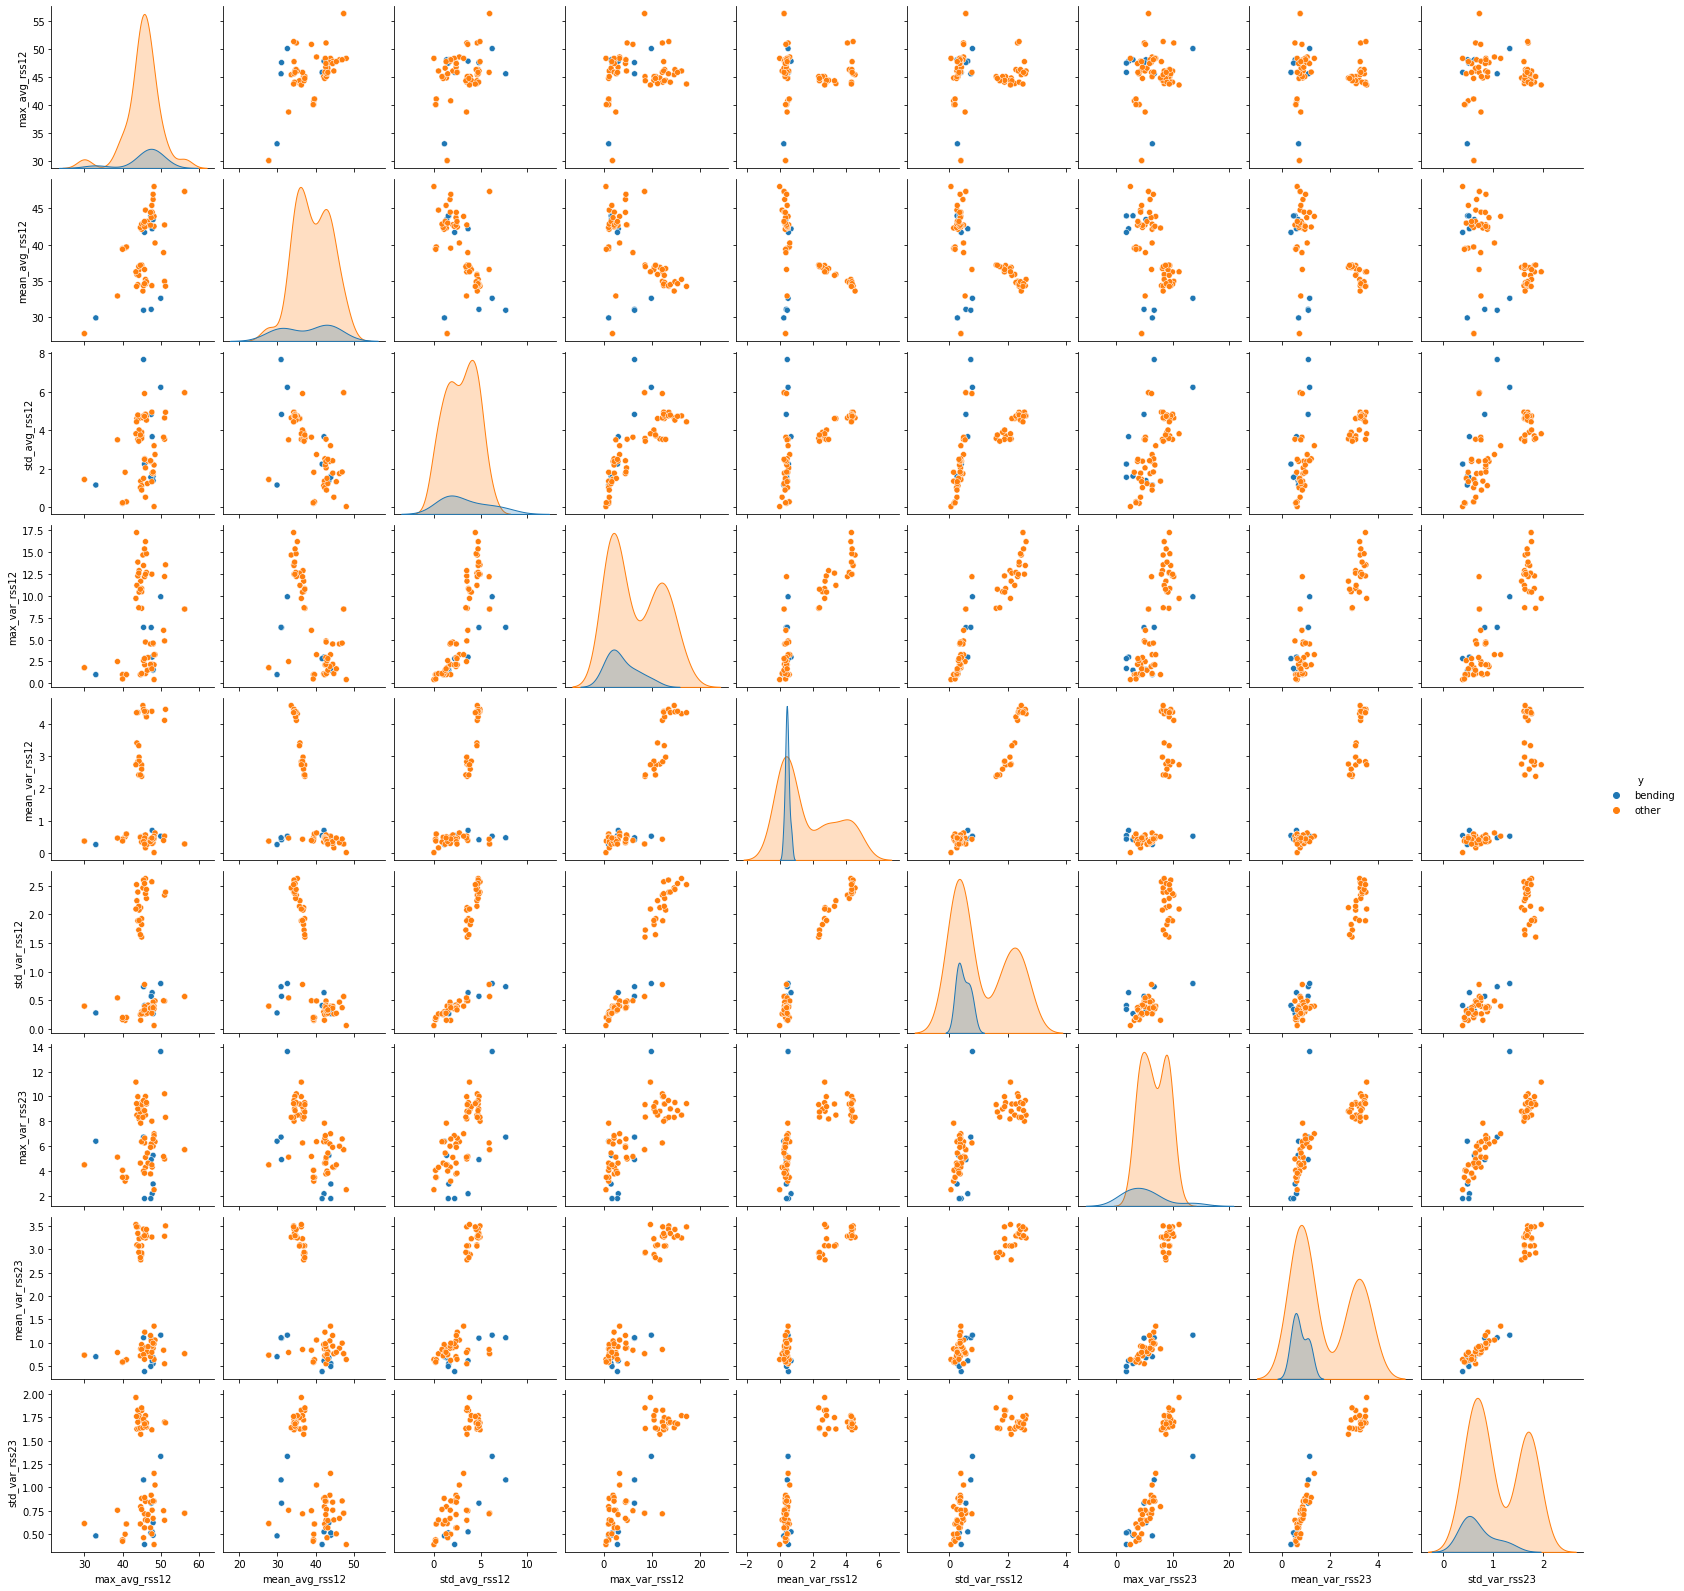

In [14]:
sns.pairplot(train_fea_ex,vars=train_fea_ex.columns[0:9], hue='y');


### ii.

In [15]:
parts_data = ['1','2']
split_col_name = ['dataset_name']
for j in time_series_number:
    for k in parts_data:
        for i in feature_extracted:
            split_col_name.append(i+'_'+j+'_'+k)
split_col_name.append('y')

In [16]:
New_dataset_split = pd.DataFrame(columns=split_col_name)

# Max, Mean and STD
for i in df_var:
    row=[i]
    for j in time_series_number:
        this_col = locals()[i][j]
        length = len(this_col)
#         print(len(this_col[(length)//2 : ]))
        features = [max(this_col[:length//2]), this_col[:length//2].median(),this_col[:length//2].std(),\
                   max(this_col[length//2:]), this_col[length//2:].median(),this_col[length//2:].std()]
#                     max(this_col[length//2:]),this_col.mean(),this_col.median()\
#                    ,this_col.std(),np.percentile(this_col, 25),np.percentile(this_col, 75)]
        [row.append(n) for n in features]
#     print(row)
    if i[:-3] == 'bending':
        row.append('bending')
    else:
        row.append('other')
    df_length = len(New_dataset_split)
    New_dataset_split.loc[df_length] = row
    
train_New_dataset_split = New_dataset_split.loc[New_dataset_split['dataset_name'].\
                                                isin(np.array(train_table['dataset_name']))]
train_New_dataset_split


dataset_name  max_avg_rss12_1  mean_avg_rss12_1  std_avg_rss12_1  \
0    bending1_7            45.00            43.710         1.281976   
1    bending1_6            48.00            45.000         1.359836   
2    bending1_4            47.75            45.000         3.473355   
3    bending1_5            45.75            42.330         3.118644   
6    bending1_3            46.50            44.500         1.556971   
..          ...              ...               ...              ...   
83   walking_12            44.50            34.415         4.872880   
84   walking_15            44.00            35.375         4.634209   
85   walking_14            44.00            35.330         4.272282   
86    walking_8            44.00            35.750         4.869092   
87    walking_9            42.75            34.710         4.549837   

    max_avg_rss12_2  mean_avg_rss12_2  std_avg_rss12_2  max_var_rss12_1  \
0             48.00             44.50         1.771251             1.30   
1             46.50             42.67         1.058792             1.30   
2             46.00             42.00         3.537481             3.00   
3             43.67             41.50         0.595920             2.83   
6             47.40             43.50         1.557168             1.50   
..              ...               ...              ...              ...   
83            45.50             35.50         4.621400            13.47   
84            43.33             34.50         4.923609            13.86   
85            46.25             35.25         4.785599            14.82   
86            45.75             35.00         4.588342            12.38   
87            43.67             34.75         4.338107            14.50   

    mean_var_rss12_1  std_var_rss12_1  max_var_rss12_2  mean_var_rss12_2  \
0              0.470         0.284434             1.50             0.500   
1              0.000         0.314099             1.58             0.500   
2              0.485         0.634285             2.86             0.500   
3              0.500         0.489595             1.12             0.500   
6              0.470         0.329540             1.70             0.500   
..               ...              ...              ...               ...   
83             4.030         2.762730            12.50             3.740   
84             3.850         2.396878            12.97             4.195   
85             3.865         2.341763            12.26             4.070   
86             3.770         2.512633            15.37             4.075   
87             3.880         2.470266            17.24             4.025   

    std_var_rss12_2  max_var_rss23_1  mean_var_rss23_1  std_var_rss23_1  \
0          0.235493             2.28             0.470         0.486847   
1          0.260761             5.26             0.710         0.718016   
2          0.627915             1.53             0.765         0.554542   
3          0.273050             1.79             0.430         0.411200   
6          0.342346             1.79             0.500         0.526656   
..              ...              ...               ...              ...   
83         2.387460             8.41             3.255         1.703098   
84         2.381634             9.00             3.200         1.737420   
85         2.514203             9.18             3.270         1.781928   
86         2.561608             8.86             2.870         1.647640   
87         2.571376             9.42             3.180         1.725690   

    max_var_rss23_2  mean_var_rss23_2  std_var_rss23_2        y  
0              2.96             0.500         0.487918  bending  
1              4.06             0.500         0.473445  bending  
2              2.18             0.470         0.491873  bending  
3              1.50             0.430         0.363144  bending  
6              1.50             0.000         0.478528  bending  
..              ...               ...  

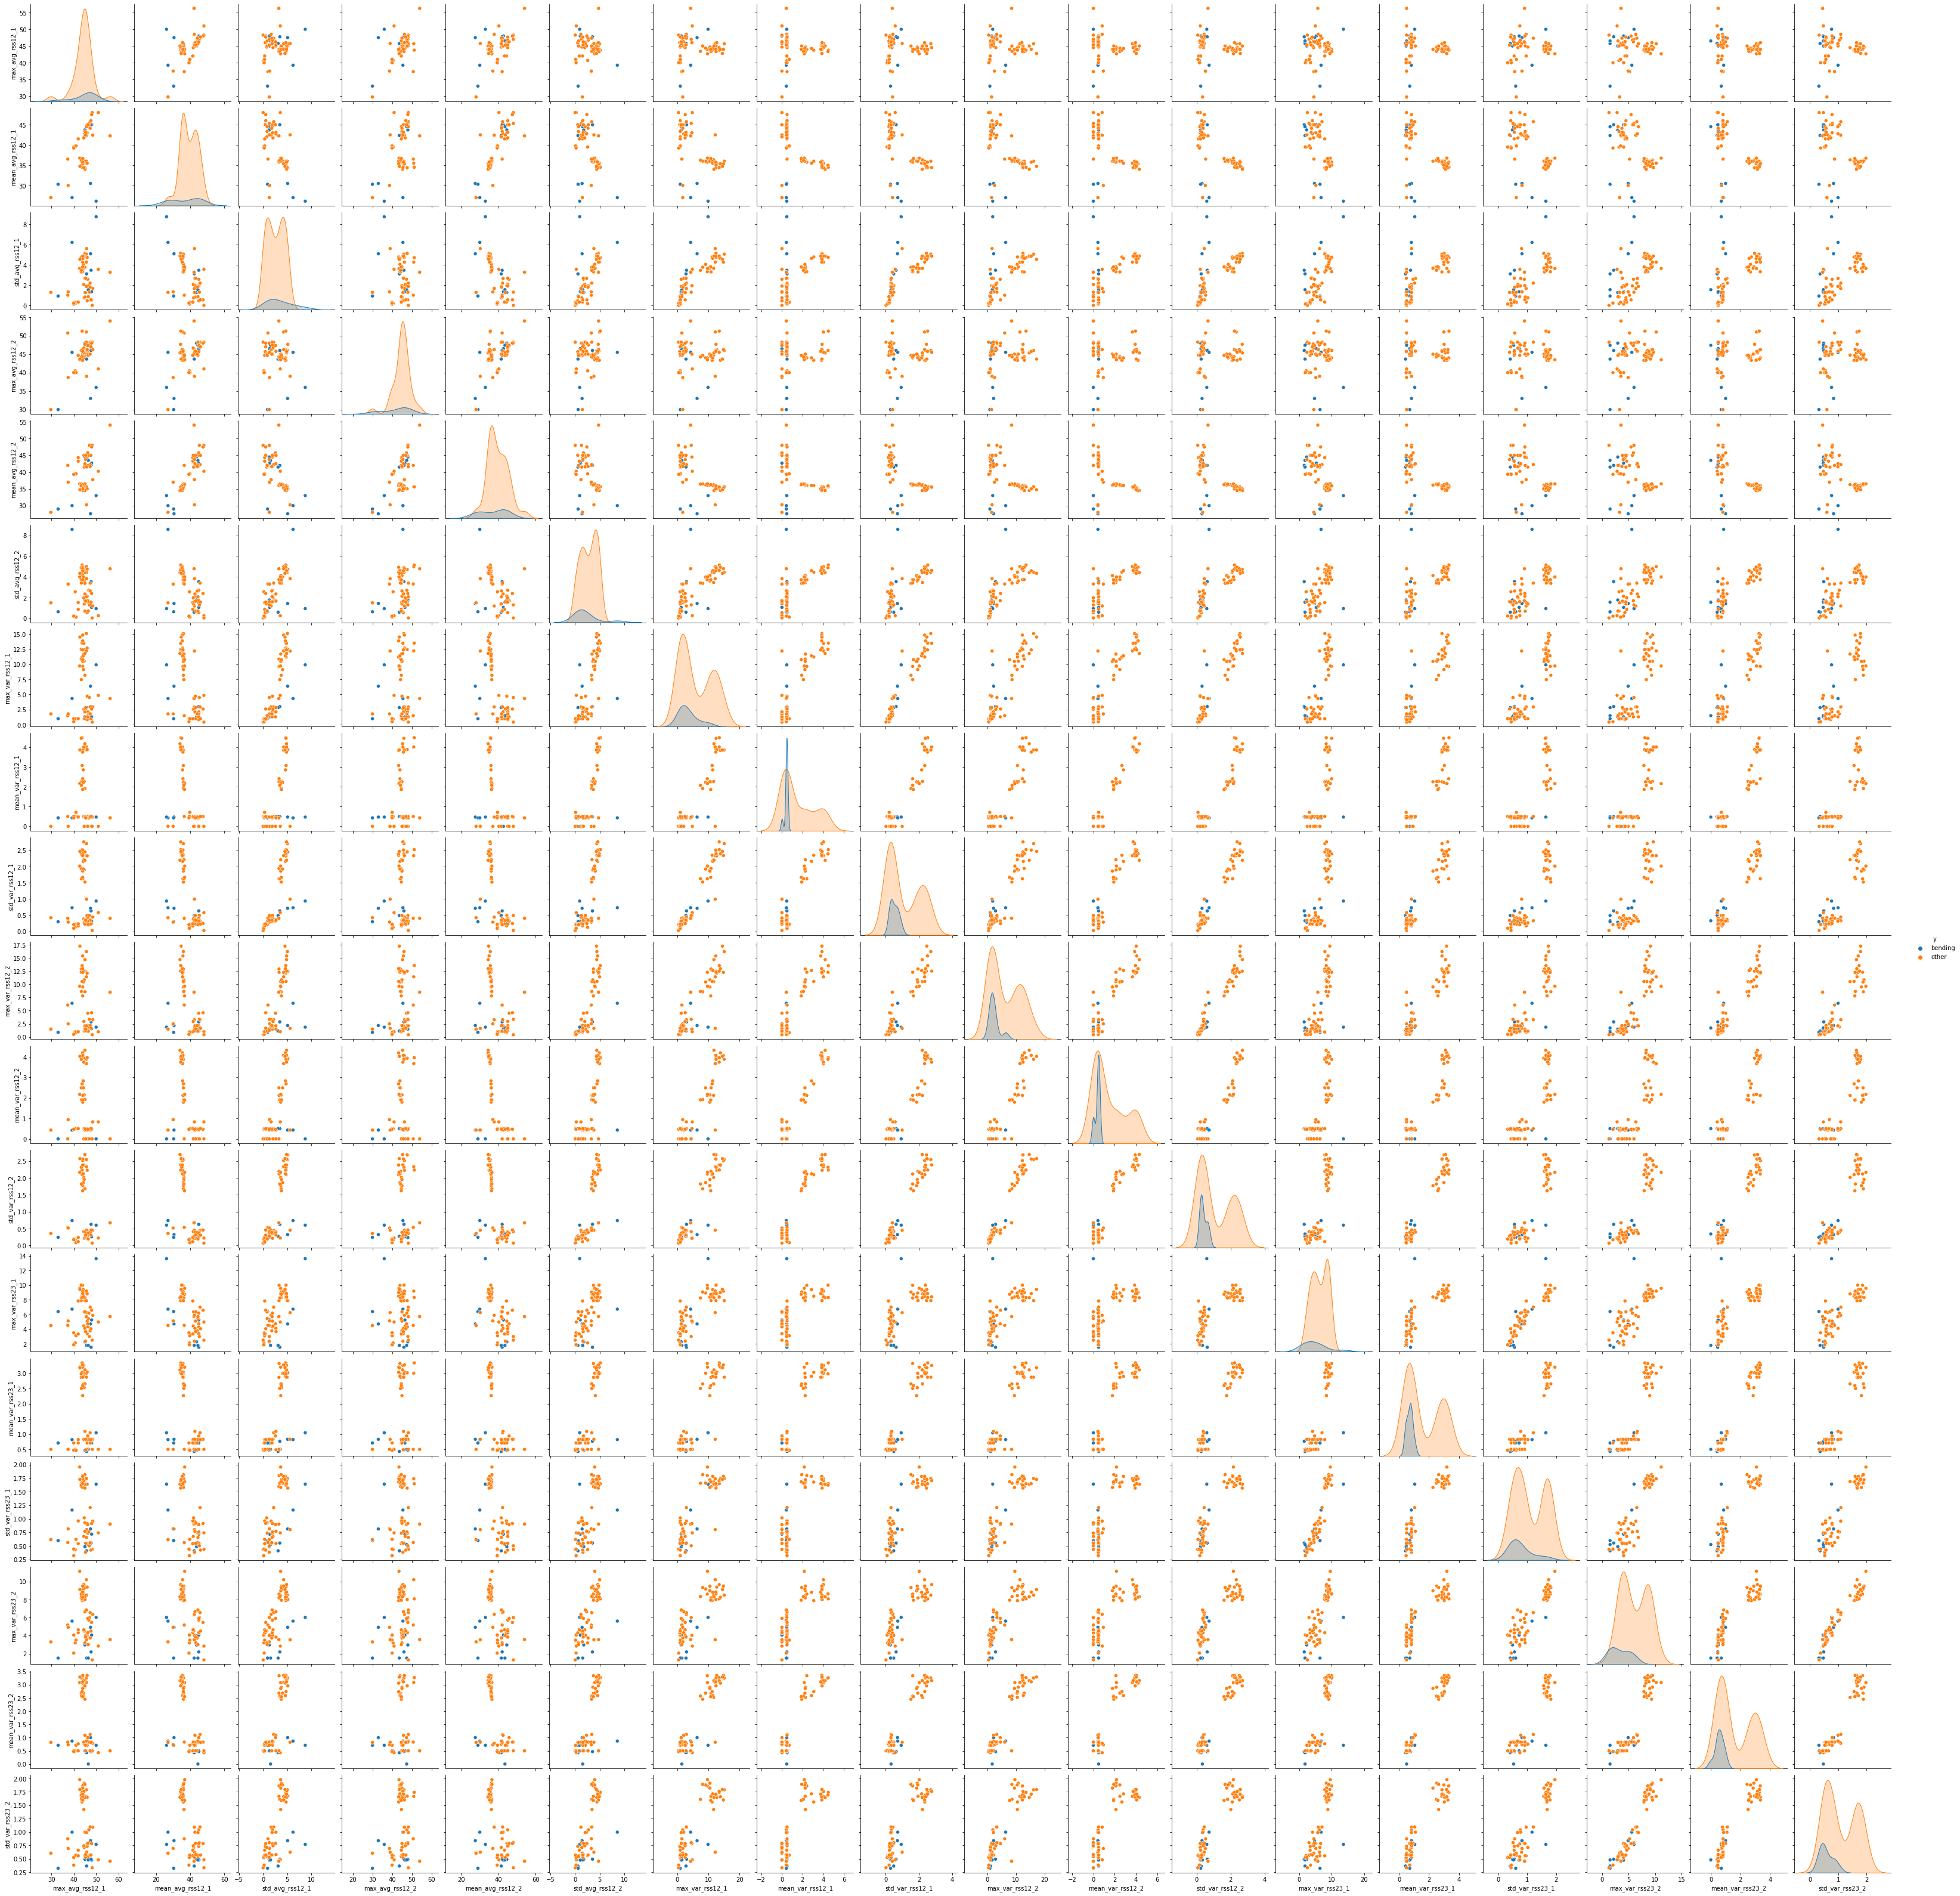

In [17]:
sns.pairplot(train_New_dataset_split,vars=train_New_dataset_split.columns[1:19], hue='y');

    # Answer: The blue points (bending) are more seperated from other points. 

### iii.

In [15]:
time_series_number = ["avg_rss12", "var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
for n in range(2,22):
    l_parts_data = range(1,n)
    l_split_col_name = ['dataset_name']
    for j in time_series_number:
        for k in l_parts_data:
            for i in feature_extracted:
                l_split_col_name.append(i+'_'+j+'_'+str(k))
    l_split_col_name.append('y')
    
    locals() ['l_New_dataset_split_' + str(n-1)] = pd.DataFrame(columns=l_split_col_name)
    
    for i in df_var:
        row=[i]
        for j in time_series_number:
            this_col = locals()[i][j]
            length = len(this_col)
            slot = length//(n-1)
            
            for k in range(0,n-1):
                
                features = [max(this_col[k*slot:(k+1)*slot]), this_col[k*slot:(k+1)*slot].median()\
                            ,this_col[k*slot:(k+1)*slot].std()]

                [row.append(m) for m in features]
              
        if i[:-3] == 'bending':
            row.append('bending')
        else:
            row.append('other')
        df_length = len(locals() ['l_New_dataset_split_' + str(n-1)])
        (locals() ['l_New_dataset_split_' + str(n-1)]).loc[df_length] = row
    
    locals() ['train_l_New_dataset_split_' + str(n-1)] = (locals() ['l_New_dataset_split_' + str(n-1)])\
    .loc[(locals() ['l_New_dataset_split_' + str(n-1)])['dataset_name']\
         .isin(np.array(train_table['dataset_name']))]


In [16]:
train_l_New_dataset_split_3[:10]

dataset_name  max_avg_rss12_1  mean_avg_rss12_1  std_avg_rss12_1  \
0    bending1_7            45.00            42.775         0.997720   
1    bending1_6            48.00            45.000         0.797137   
2    bending1_4            47.75            45.000         3.348026   
3    bending1_5            45.00            41.500         3.203229   
6    bending1_3            46.50            44.500         1.386745   
7    bending2_6            47.50            38.290         4.898639   
8    bending2_4            33.00            31.250         0.881477   
9    bending2_5            39.25            28.000         5.049328   
12   bending2_3            50.00            25.290         7.336640   
13    cycling_7            44.00            36.415         3.699942   

    max_avg_rss12_2  mean_avg_rss12_2  std_avg_rss12_2  max_avg_rss12_3  \
0             48.00            44.500         1.458163            48.00   
1             45.00            42.500         1.020441            46.50   
2             46.67            43.375         3.488366            45.25   
3             45.75            42.585         1.525786            42.50   
6             47.00            45.000         1.634242            47.40   
7             32.00            29.500         0.856467            33.00   
8             30.50            30.000         0.509603            30.00   
9             43.75            21.330         6.187945            45.50   
12            48.00            34.750         4.627843            35.25   
13            44.75            36.125         3.578652            43.67   

    mean_avg_rss12_3  std_avg_rss12_3  ...  max_var_rss23_1  mean_var_rss23_1  \
0              44.50         1.861550  ...             2.28             0.430   
1              42.71         1.187473  ...             5.26             0.605   
2              42.00         3.639943  ...             1.50             0.830   
3              41.50         0.398374  ...             1.64             0.430   
6              43.50         1.567928  ...             1.50             0.500   
7              27.00         1.255525  ...             3.74             0.820   
8              29.00         0.634808  ...             6.40             0.710   
9              38.25         7.453721  ...             6.02             0.605   
12             33.00         1.052923  ...            13.61             1.090   
13             36.33         3.403657  ...             8.81             2.685   

    std_var_rss23_1  max_var_rss23_2  mean_var_rss23_2  std_var_rss23_2  \
0          0.515306             2.12             0.470         0.420491   
1          0.778251             2.87             0.500         0.486926   
2          0.536991             1.53             0.470         0.533404   
3          0.420577             1.79             0.430         0.445961   
6          0.495724             1.79             0.500         0.568450   
7          0.837663             4.92             1.000         0.867009   
8          0.704434             1.70             0.710         0.304496   
9          0.950489             6.73             1.120         1.238825   
12         1.761255             7.13             0.830         1.263265   
13         1.796246             8.44             2.595         1.505101   

    max_var_rss23_3  mean_var_rss23_3  std_var_rss23_3        y  
0              2.96             0.500         0.515526  bending  
1              4.06             0.470         0.530484  bending  
2              2.18             0.470         0.501447  bending  
3              1.00             0.430         0.263002  bending  
6              1.50             0.000         0.445907  bending  
7              4.50             1.000         0.781980  bending  
8              1.48             0.710         0.325249  bending  
9              5.61             0.820         0.923435  bending  
12             4.50             0.605         0.497428  bending  
13             7.

In [17]:
max_scores = []
p_array = []
l_array = []
for i in range(1,21):
    this_df = locals() ['train_l_New_dataset_split_'+str(i)]
    le = preprocessing.LabelEncoder()
    le.fit(this_df['y'])
    this_df['y'] = le.transform(this_df['y'])

    model = LogisticRegression(penalty='none',max_iter=1000,solver='lbfgs')
    rfecv = RFECV(model, cv=StratifiedKFold(5,random_state=31,shuffle=True),scoring="accuracy")

    fitted = rfecv.fit(this_df.iloc[:, 1:-1],this_df['y'])
    max_scores.append(max(fitted.grid_scores_))
    p_array.append(fitted.n_features_)
    l_array.append(i)


<ipython-input-17-d7e2a2d36b4c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_df['y'] = le.transform(this_df['y'])
<ipython-input-17-d7e2a2d36b4c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_df['y'] = le.transform(this_df['y'])
<ipython-input-17-d7e2a2d36b4c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [18]:
best_score_dataset = pd.DataFrame(columns=['max_score', 'p','l'])

In [19]:
best_score_dataset['max_score'] = max_scores
best_score_dataset['p'] = p_array
best_score_dataset['l'] = l_array

In [20]:
best_score_dataset

max_score    p   l
0    0.942857    4   1
1    0.956044    1   2
2    0.971429    1   3
3    0.971429    2   4
4    0.957143    4   5
5    0.957143    9   6
6    0.957143   52   7
7    0.985714    7   8
8    0.971429    1   9
9    0.985714   34  10
10   0.971429    7  11
11   0.985714   30  12
12   0.971429   14  13
13   0.971429    5  14
14   0.971429    3  15
15   0.985714   14  16
16   0.985714  154  17
17   0.971429    1  18
18   0.971429   23  19
19   0.971429   42  20

In [21]:
print('The largest "max_score" is: '+str(max(max_scores))+'. The corresponding (l,p) pair is: ('+\
      str(l_array[np.argmax(max_scores)])+', '+str(p_array[np.argmax(max_scores)])+').')

The largest "max_score" is: 0.9857142857142858. The corresponding (l,p) pair is: (8, 7).


    # Answer: 
        Correct: We should set a stable random seed number 
                 We should shuffle the data to make the portion of every class even.
                 use strafied to make data balanced.
        Wrong: Use test data set.
               Repeat feature elimation steps because RFECV has done that.

### iv:

In [22]:
this_df = locals() ['train_l_New_dataset_split_'+str(l_array[np.argmax(max_scores)])]

model = LogisticRegression(penalty='none',max_iter=1000,solver='lbfgs')
rfecv = RFECV(model, cv=StratifiedKFold(5,random_state=31,shuffle=True),scoring="accuracy")

fitted = rfecv.fit(this_df.iloc[:, 1:-1],this_df['y'])

In [23]:
ind_arr = []
ind = 0
for i in fitted.ranking_:
    ind += 1
    if i == 1:
        ind_arr.append(ind)    

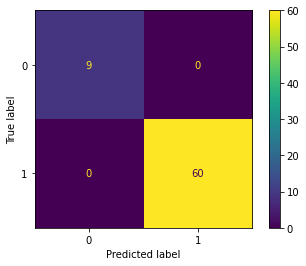

In [24]:
two_split_y_pred = fitted.predict(this_df.iloc[:, 1:-1])
cm = confusion_matrix(this_df['y'], two_split_y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
# Source: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.
#html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


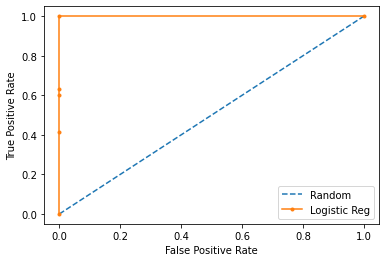

In [25]:
lr_probs = fitted.predict_proba(this_df.iloc[:, 1:-1])
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(this_df['y']))]
ns_auc = roc_auc_score(this_df['y'], ns_probs)
lr_auc = roc_auc_score(this_df['y'], lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(this_df['y'], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(this_df['y'], lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Reg')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# code from: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [26]:
denom = (2.0*(1.0+np.cosh(fitted.decision_function(this_df.iloc[:, 1:-1]))))
denom = np.tile(denom,(this_df.iloc[:, ind_arr].shape[1],1)).T
F_ij = np.dot(((this_df.iloc[:, ind_arr])/denom).T,this_df.iloc[:, ind_arr]) ## Fisher Information Matrix
Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
z_scores = fitted.estimator_.coef_[0]/sigma_estimates # z-score for eaach model coefficient
p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
# source: https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d

In [27]:
print('Features are: Beta'+str(ind_arr))
print('Their coeficients are: '+str(fitted.estimator_.coef_))

Features are: Beta[14, 16, 97, 100, 101, 127, 142]
Their coeficients are: [[ 1.36003923  1.52741787 -2.28023935 -1.37129463 -1.50218338  1.31099395
   1.25427236]]


In [28]:
p_values

[0.9965996801942055,
 0.9964167033174434,
 0.9913211296956908,
 0.9961401121733444,
 0.9946405669033986,
 0.9980060627296204,
 0.9983765037880248]

### v.

In [29]:
test_table
test_l_New_dataset_split_8 = l_New_dataset_split_8.loc[l_New_dataset_split_8['dataset_name'].\
                                                       isin(np.array(test_table['dataset_name']))]
test_l_New_dataset_split_8

dataset_name  max_avg_rss12_1  mean_avg_rss12_1  std_avg_rss12_1  \
4    bending1_1            42.00            40.750         0.939498   
5    bending1_2            44.25            43.500         0.365490   
10   bending2_1            24.75            21.875         2.762425   
11   bending2_2            30.00            27.125         1.434190   
17    cycling_1            44.50            35.375         3.895121   
18    cycling_2            43.25            36.750         3.093811   
19    cycling_3            44.00            36.670         3.201327   
32      lying_1            29.75            29.000         0.256743   
33      lying_2            30.00            29.000         0.484019   
34      lying_3            48.00            48.000         0.000000   
47    sitting_1            42.25            42.000         0.148517   
48    sitting_2            50.75            48.000         1.977243   
49    sitting_3            46.67            45.500         0.409261   
62   standing_1            47.50            46.500         0.505962   
63   standing_2            45.00            43.330         1.576973   
64   standing_3            45.50            44.500         1.898388   
77    walking_1            41.33            36.000         4.766564   
78    walking_2            40.75            35.415         4.889929   
79    walking_3            41.33            33.750         4.611761   

    max_avg_rss12_2  mean_avg_rss12_2  std_avg_rss12_2  max_avg_rss12_3  \
4             42.33            42.000         0.189316            42.00   
5             43.67            42.670         0.536136            42.67   
10            26.75            23.750         3.485437            30.00   
11            30.00            29.500         0.967788            30.00   
17            44.00            36.875         3.296369            43.50   
18            43.67            36.665         2.687704            44.00   
19            44.50            36.625         3.447441            44.67   
32            29.75            27.000         0.931874            29.75   
33            48.00            30.125         8.463054            48.25   
34            48.00            48.000         0.000000            48.00   
47            43.50            42.000         0.596177            44.00   
48            45.50            45.000         0.166972            45.33   
49            46.75            46.250         0.523779            45.75   
62            47.00            45.750         0.640441            48.00   
63            43.67            42.750         0.477455            45.00   
64            45.75            45.250         0.208897            46.50   
77            42.50            35.710         4.897941            41.50   
78            42.25            34.415         4.535509            43.00   
79            43.33            34.125         4.903330            45.33   

    mean_avg_rss12_3  std_avg_rss12_3  ...  max_var_rss23_6  mean_var_rss23_6  \
4             42.000         1.541988  ...             1.87             0.830   
5             42.250         0.199209  ...             2.62             0.450   
10            25.875         2.325126  ...             4.97             0.500   
11            29.250         0.513591  ...             6.76             1.045   
17            35.875         4.235352  ...             8.18             2.470   
18            37.000         3.327751  ...             7.82             2.470   
19            37.290         3.668859  ...             7.79             2.930   
32            27.000         1.026778  ...             2.55             0.820   
33            48.000         0.032275  ...             1.50             0.500   
34            48.000         0.000000  ...             1.30             0.820   
47            43.500         0.357452  ...             1.70             0.470   
48            45.000         0.112889  ...             2.35             0.470   
49            45.000        

In [30]:
le = preprocessing.LabelEncoder()
le.fit(test_l_New_dataset_split_8['y'])
test_l_New_dataset_split_8['y'] = le.transform(test_l_New_dataset_split_8['y'])
eight_split_y_pred_test = fitted.predict(test_l_New_dataset_split_8.iloc[:, 1:-1])


<ipython-input-30-e895e2878221>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_l_New_dataset_split_8['y'] = le.transform(test_l_New_dataset_split_8['y'])


In [31]:
accuracy_score(eight_split_y_pred_test, test_l_New_dataset_split_8['y'])

0.9473684210526315

    # Answer: Test accuracy is :0.947, the CV accuracy is 1. 

### vi.

    #I encountered with this issue when using defult max_iter. After changing that to 1000, the model is stable. 

### vii.

    # No inbalanced data found. All data are correctly classified.

### b.i

In [32]:
max_scores = []
mean_scores = []
c_array = []
l_array = []
for i in range(1,21):
    this_df = locals() ['train_l_New_dataset_split_'+str(i)]

    model = LogisticRegressionCV(Cs=10,cv=StratifiedKFold(5,random_state=31,shuffle=True),\
                                 solver='liblinear',penalty='l1',max_iter=1000)
 
    fitted = model.fit(this_df.iloc[:, 1:-1],this_df['y'])
    
    max_scores.append(fitted.scores_.get(1).max())
    mean_scores.append(fitted.scores_[1].mean())
    l_array.append(i)
    c_array.append(fitted.C_[0])
#     p_array.append(fitted.n_features_)
#     print(i)
#     print(fitted.coef_)
#     print(fitted.scores_)   

In [33]:
best_score_dataset_l1 = pd.DataFrame(columns=['max_score', 'C','l','mean_scores'])
best_score_dataset_l1['max_score'] = max_scores
best_score_dataset_l1['C'] = c_array
best_score_dataset_l1['l'] = l_array
best_score_dataset_l1['mean_scores'] = mean_scores
best_score_dataset_l1

max_score          C   l  mean_scores
0         1.0   0.046416   1     0.757033
1         1.0   0.046416   2     0.761429
2         1.0   0.359381   3     0.768571
3         1.0   0.359381   4     0.768352
4         1.0  21.544347   5     0.752198
5         1.0   2.782559   6     0.755385
6         1.0   2.782559   7     0.762637
7         1.0   2.782559   8     0.764066
8         1.0   2.782559   9     0.757033
9         1.0   0.359381  10     0.762747
10        1.0   0.046416  11     0.764066
11        1.0   0.046416  12     0.761099
12        1.0   0.046416  13     0.752637
13        1.0   2.782559  14     0.764176
14        1.0  21.544347  15     0.766923
15        1.0  21.544347  16     0.762637
16        1.0  21.544347  17     0.762637
17        1.0   0.046416  18     0.766923
18        1.0   0.046416  19     0.765495
19        1.0   0.046416  20     0.766923

In [34]:
print('The largest "mean_score" is: '+str(max(mean_scores))+'. The corresponding (l,C) pair is: ('+\
      str(l_array[np.argmax(mean_scores)])+', '+str(c_array[np.argmax(mean_scores)])+').')
# lots of models have the same score, I would like to select l=20.

The largest "mean_score" is: 0.7685714285714286. The corresponding (l,C) pair is: (3, 0.3593813663804626).


In [40]:
this_df = locals() ['train_l_New_dataset_split_'+str(20)]

model = LogisticRegressionCV(Cs=10,cv=StratifiedKFold(5,random_state=31,shuffle=True),solver='liblinear',penalty='l1',max_iter=1000)

fitted = model.fit(this_df.iloc[:, 1:-1],this_df['y'])

In [41]:
test_l_New_dataset_split_20 = l_New_dataset_split_20.loc[l_New_dataset_split_20['dataset_name'].\
                                                       isin(np.array(test_table['dataset_name']))]
le.fit(test_l_New_dataset_split_20['y'])
test_l_New_dataset_split_20['y'] = le.transform(test_l_New_dataset_split_20['y'])

twenty_split_y_pred_test = fitted.predict(test_l_New_dataset_split_20.iloc[:, 1:-1])

<ipython-input-41-6d07068fce78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_l_New_dataset_split_20['y'] = le.transform(test_l_New_dataset_split_20['y'])


In [42]:
accuracy_score(twenty_split_y_pred_test, test_l_New_dataset_split_20['y'])

0.9473684210526315

In [43]:
# The coeficients of all features in logistic regression are:
ind_arr = []
co_arr = []
coefs = fitted.coef_[0]
for i in range(len(coefs)):
    if coefs[i] != 0:
        ind_arr.append(i)
        co_arr.append(coefs[i])
print('Coeficient indice are: '+str(ind_arr))
print('Coeficients are: '+str(co_arr))

Coeficient indice are: [30, 45, 247]
Coeficients are: [0.08796282919221884, 0.07047773817222104, -0.24838628383283332]


### ii.

    # In the aspect of accuracy, these two models have a similar performance, but L1-penalized logistic regression is easier to implrment.

### c.i.

In [44]:
for n in range(2,22):
    l_parts_data = range(1,n)
    l_split_col_name = ['dataset_name']
    for j in time_series_number:
        for k in l_parts_data:
            for i in feature_extracted:
                l_split_col_name.append(i+'_'+j+'_'+str(k))
    l_split_col_name.append('y')
    
    locals() ['l_New_dataset_split_' + str(n-1)] = pd.DataFrame(columns=l_split_col_name)
    
    for i in df_var:
        row=[i]
        for j in time_series_number:
            this_col = locals()[i][j]
            length = len(this_col)
            slot = length//(n-1)
            
            for k in range(0,n-1):
                
                features = [max(this_col[k*slot:(k+1)*slot]), this_col[k*slot:(k+1)*slot].median()\
                            ,this_col[k*slot:(k+1)*slot].std()]

                [row.append(m) for m in features]
              
        if i[:-3] == 'bending':
            row.append('bending')
        else:
            row.append(i[:i.find('ing')+3])
        df_length = len(locals() ['l_New_dataset_split_' + str(n-1)])
        (locals() ['l_New_dataset_split_' + str(n-1)]).loc[df_length] = row
    
    locals() ['train_l_New_dataset_split_' + str(n-1)] = (locals() ['l_New_dataset_split_' + str(n-1)])\
    .loc[(locals() ['l_New_dataset_split_' + str(n-1)])['dataset_name']\
         .isin(np.array(train_table['dataset_name']))]


In [45]:
train_l_New_dataset_split_10

dataset_name  max_avg_rss12_1  mean_avg_rss12_1  std_avg_rss12_1  \
0    bending1_7            44.50            43.165         1.021629   
1    bending1_6            46.75            45.000         0.877049   
2    bending1_4            47.75            45.125         3.291462   
3    bending1_5            45.00            42.000         2.113836   
6    bending1_3            45.00            44.500         1.281888   
..          ...              ...               ...              ...   
83   walking_12            44.50            34.000         4.747919   
84   walking_15            43.00            36.875         4.135792   
85   walking_14            42.75            34.710         4.530941   
86    walking_8            44.00            37.125         4.751155   
87    walking_9            42.75            34.875         4.764014   

    max_avg_rss12_2  mean_avg_rss12_2  std_avg_rss12_2  max_avg_rss12_3  \
0             45.00            42.000         0.746914            44.50   
1             45.25            45.000         0.061156            48.00   
2             46.00            45.000         2.604357            47.75   
3             45.00            41.250         3.046591            45.00   
6             45.00            44.500         1.183495            46.50   
..              ...               ...              ...              ...   
83            42.75            35.125         4.769352            42.50   
84            43.50            35.000         4.638796            43.75   
85            41.00            35.250         3.782841            43.50   
86            43.75            34.500         4.880421            42.50   
87            42.67            34.835         4.522189            40.50   

    mean_avg_rss12_3  std_avg_rss12_3  ...  max_var_rss23_8  mean_var_rss23_8  \
0             43.500         0.899601  ...             2.96             0.500   
1             45.000         0.997342  ...             1.12             0.430   
2             45.000         3.579103  ...             2.12             0.500   
3             40.725         3.883784  ...             0.87             0.430   
6             44.000         1.715061  ...             1.50             0.905   
..               ...              ...  ...              ...               ...   
83            34.415         5.228155  ...             7.40             3.540   
84            35.250         5.278065  ...             7.02             3.085   
85            35.250         4.411102  ...             7.31             3.420   
86            36.290         4.412080  ...             8.84             2.905   
87            34.500         4.348862  ...             8.79             2.890   

    std_var_rss23_8  max_var_rss23_9  mean_var_rss23_9  std_var_rss23_9  \
0          0.635310             2.62             0.765         0.506642   
1          0.320831             1.22             0.470         0.337069   
2          0.563746             2.18             0.500         0.442293   
3          0.249261             0.83             0.430         0.255325   
6          0.452050             0.87             0.000         0.243633   
..              ...              ...               ...              ...   
83         1.393468             9.67             2.980         1.922980   
84         1.458479             8.26             3.150         1.725091   
85         1.655820             7.18             3.560         1.589052   
86         1.792900             8.22             3.190         1.590419   
87         1.931017             8.08             3.180         1.568492   

    max_var_rss23_10  mean_var_rss23_10  std_var_rss23_10        y  
0               1.73              0.500          0.390215  bending  
1               4.06              0.485          0.819227  bending  
2               1.50              0.430          0.505038  bending  
3               1.00              0.430          0.281401  bending  
6               1.30          

In [46]:
max_scores = []
mean_scores = []
c_array = []
l_array = []
for i in range(1,21):
    this_df = locals() ['train_l_New_dataset_split_'+str(i)]
    le = preprocessing.LabelEncoder()
    le.fit(this_df['y'])
    this_df['y'] = le.transform(this_df['y'])

    model = LogisticRegressionCV(Cs=10,cv=StratifiedKFold\
                                 (5,random_state=31,shuffle=True),solver='liblinear',penalty='l1',max_iter=5000)

    fitted = model.fit(this_df.iloc[:, 1:-1],this_df['y'])
    
    max_arr_dic = []
    mean_arr_dic = []
    for i in range(0,5):
        max_arr_dic.append(fitted.scores_.get(i).max())
        mean_arr_dic.append(fitted.scores_.get(i).mean())
    
    max_scores.append(np.mean(max_arr_dic))
    mean_scores.append(np.mean(mean_arr_dic))
    l_array.append(i)
    c_array.append(fitted.C_[0])

<ipython-input-46-905e9af77516>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_df['y'] = le.transform(this_df['y'])
<ipython-input-46-905e9af77516>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_df['y'] = le.transform(this_df['y'])
<ipython-input-46-905e9af77516>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [47]:
best_score_dataset_mul = pd.DataFrame(columns=['max_score', 'C','l','mean_scores'])
best_score_dataset_mul['max_score'] = max_scores
best_score_dataset_mul['C'] = c_array
best_score_dataset_mul['l'] = l_array
best_score_dataset_mul['mean_scores'] = mean_scores
best_score_dataset_mul

max_score          C  l  mean_scores
0    1.000000   0.359381  4     0.889648
1    1.000000   2.782559  4     0.891824
2    1.000000   2.782559  4     0.884176
3    0.985714   2.782559  4     0.885890
4    0.985714   0.359381  4     0.881121
5    0.985714   2.782559  4     0.875758
6    0.971429   0.359381  4     0.875143
7    0.985714   2.782559  4     0.875912
8    0.971429  21.544347  4     0.869209
9    0.985714   2.782559  4     0.876242
10   0.971429   0.046416  4     0.871648
11   0.971429   0.359381  4     0.872703
12   0.971429   0.359381  4     0.872593
13   0.971429   0.359381  4     0.872989
14   0.971429   2.782559  4     0.878044
15   0.985714  21.544347  4     0.878110
16   0.985714  21.544347  4     0.870725
17   0.985714   0.046416  4     0.873692
18   0.985714   0.046416  4     0.867363
19   0.971429   0.046416  4     0.870813

In [48]:
print('The largest "mean_score" is: '+str(max(mean_scores))+'. The corresponding (l,C) pair is: ('+\
      str(l_array[np.argmax(mean_scores)])+', '+str(c_array[np.argmax(mean_scores)])+').')

The largest "mean_score" is: 0.8918241758241757. The corresponding (l,C) pair is: (4, 2.782559402207126).


In [49]:
this_df = locals() ['train_l_New_dataset_split_'+str(l_array[np.argmax(mean_scores)])]

model = LogisticRegressionCV(Cs=10,cv=StratifiedKFold\
                                 (5,random_state=31,shuffle=True),solver='liblinear',penalty='l1',max_iter=5000)

fitted = model.fit(this_df.iloc[:, 1:-1],this_df['y'])
# train_pre = fitted.predict(this_df.iloc[:, 1:-1])

In [50]:
train_pre = fitted.decision_function(this_df.iloc[:, 1:-1])


In [51]:
test_l_New_dataset_split_4 = l_New_dataset_split_4.loc[l_New_dataset_split_4['dataset_name'].\
                                                       isin(np.array(test_table['dataset_name']))]
le.fit(test_l_New_dataset_split_4['y'])
test_l_New_dataset_split_4['y'] = le.transform(test_l_New_dataset_split_4['y'])

four_split_y_pred_test = fitted.predict(test_l_New_dataset_split_4.iloc[:, 1:-1])
test_y_pre = fitted.decision_function(test_l_New_dataset_split_4.iloc[:, 1:-1])

<ipython-input-51-b10c205822d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_l_New_dataset_split_4['y'] = le.transform(test_l_New_dataset_split_4['y'])


In [52]:
accu = accuracy_score(four_split_y_pred_test, test_l_New_dataset_split_4['y'])
print('test error: '+str(1-accu))

test error: 0.3157894736842105


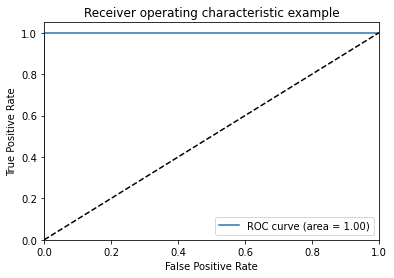

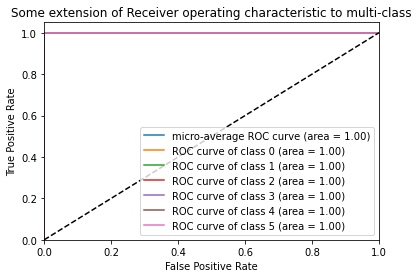

The ROC curve below is for training data


In [56]:
# Compute ROC curve and ROC area for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
ykk = label_binarize(this_df['y'], classes=[0, 1, 2, 3, 4, 5])
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(ykk[:, i], train_pre[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ykk.ravel(), train_pre.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
print("The ROC curve below is for training data")
# source: https://scikit-learn.org/0.15/auto_examples/plot_roc.html

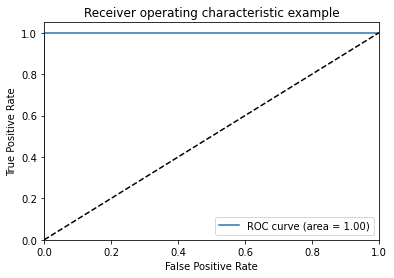

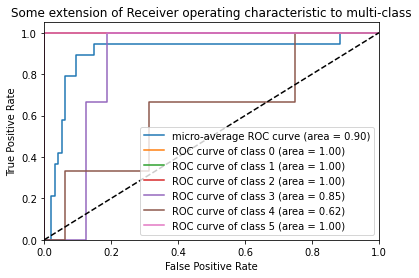

The ROC curve below is for test data.


In [57]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
ykk = label_binarize(test_l_New_dataset_split_4['y'], classes=[0, 1, 2, 3, 4, 5])
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(ykk[:, i], test_y_pre[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ykk.ravel(), test_y_pre.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
print("The ROC curve below is for test data.")
# source: https://scikit-learn.org/0.15/auto_examples/plot_roc.html

### c.ii.

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [59]:
for n in range(2,22):
    l_parts_data = range(1,n)
    l_split_col_name = ['dataset_name']
    for j in time_series_number:
        for k in l_parts_data:
            for i in feature_extracted:
                l_split_col_name.append(i+'_'+j+'_'+str(k))
    l_split_col_name.append('y')
    
    locals() ['l_New_dataset_split_' + str(n-1)] = pd.DataFrame(columns=l_split_col_name)
    
    for i in df_var:
        row=[i]
        for j in time_series_number:
            this_col = locals()[i][j]
            length = len(this_col)
            slot = length//(n-1)
            
            for k in range(0,n-1):
                
                features = [max(this_col[k*slot:(k+1)*slot]), this_col[k*slot:(k+1)*slot].median()\
                            ,this_col[k*slot:(k+1)*slot].std()]

                [row.append(m) for m in features]
              
        if i[:-3] == 'bending':
            row.append('bending')
        else:
            row.append(i[:i.find('ing')+3])
        df_length = len(locals() ['l_New_dataset_split_' + str(n-1)])
        (locals() ['l_New_dataset_split_' + str(n-1)]).loc[df_length] = row
    
    locals() ['train_l_New_dataset_split_' + str(n-1)] = (locals() ['l_New_dataset_split_' + str(n-1)])\
    .loc[(locals() ['l_New_dataset_split_' + str(n-1)])['dataset_name']\
         .isin(np.array(train_table['dataset_name']))]

In [60]:
gnb_scores = []
l_array = []
mnb_scores = []
for i in range(1,21):
    this_df = locals() ['train_l_New_dataset_split_'+str(i)]
    le = preprocessing.LabelEncoder()
    le.fit(this_df['y'])
    this_df['y'] = le.transform(this_df['y'])
    gnb = GaussianNB()
    mnb = MultinomialNB()
    
    fitted_gnb = gnb.fit(this_df.iloc[:, 1:-1],this_df['y'])
    res_gnb = fitted_gnb.predict(this_df.iloc[:, 1:-1])
    accu_gnb = accuracy_score(res_gnb, this_df['y'])
    
    fitted_mnb = mnb.fit(this_df.iloc[:, 1:-1],this_df['y'])
    res_mnb = fitted_mnb.predict(this_df.iloc[:, 1:-1])
    accu_mnb = accuracy_score(res_mnb, this_df['y'])
    
    l_array.append(i)
    gnb_scores.append(accu_gnb)
    mnb_scores.append(accu_mnb)
#     max_arr_dic = []
#     mean_arr_dic = []
#     for i in range(0,5):
#         max_arr_dic.append(fitted.scores_.get(i).max())
#         mean_arr_dic.append(fitted.scores_.get(i).mean())
    
#     max_scores.append(np.mean(max_arr_dic))
#     mean_scores.append(np.mean(mean_arr_dic))
#     l_array.append(i)
#     c_array.append(fitted.C_[0])

<ipython-input-60-764937d5cb83>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_df['y'] = le.transform(this_df['y'])
<ipython-input-60-764937d5cb83>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_df['y'] = le.transform(this_df['y'])
<ipython-input-60-764937d5cb83>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [61]:
score_l = pd.DataFrame(columns=['mnb_score','gnb_score','l',])
score_l['gnb_score'] = gnb_scores
score_l['mnb_score'] = mnb_scores
score_l['l'] = l_array
score_l

mnb_score  gnb_score   l
0    0.898551   0.971014   1
1    0.927536   0.985507   2
2    0.927536   0.985507   3
3    0.942029   0.985507   4
4    0.927536   0.985507   5
5    0.927536   0.985507   6
6    0.956522   0.985507   7
7    0.942029   0.985507   8
8    0.956522   0.985507   9
9    0.971014   0.985507  10
10   0.971014   0.985507  11
11   0.971014   0.985507  12
12   0.971014   0.985507  13
13   0.971014   0.985507  14
14   0.971014   0.985507  15
15   0.971014   0.985507  16
16   0.971014   0.985507  17
17   0.971014   0.985507  18
18   0.971014   0.985507  19
19   0.971014   1.000000  20

    # Answer: It seems that Multinomial Naive Bayes classifier has a better performace. 

### c. iii.

    # Answer: Generally, Naive Bayes classifiers have a better performance in accuracy and time using. 

###  

<center><font size="4">3. ISLR, 4.8.3</font></center>

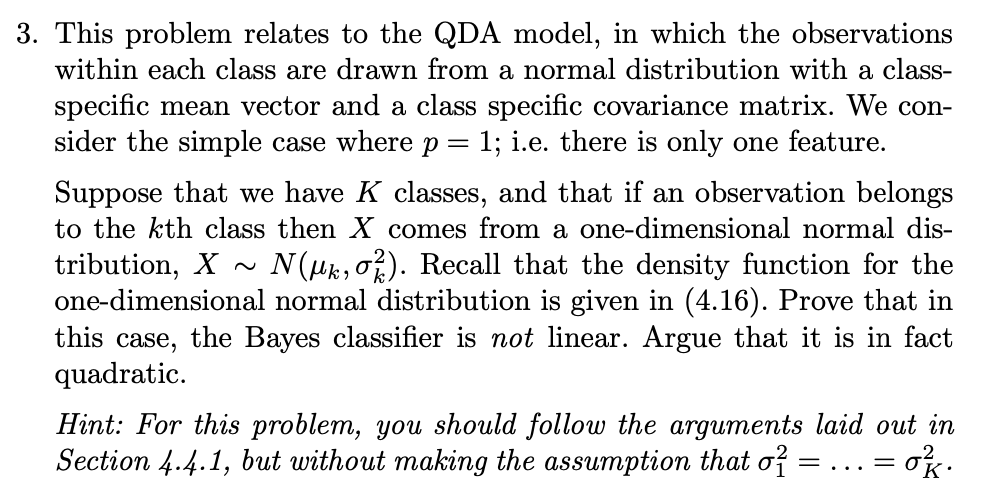

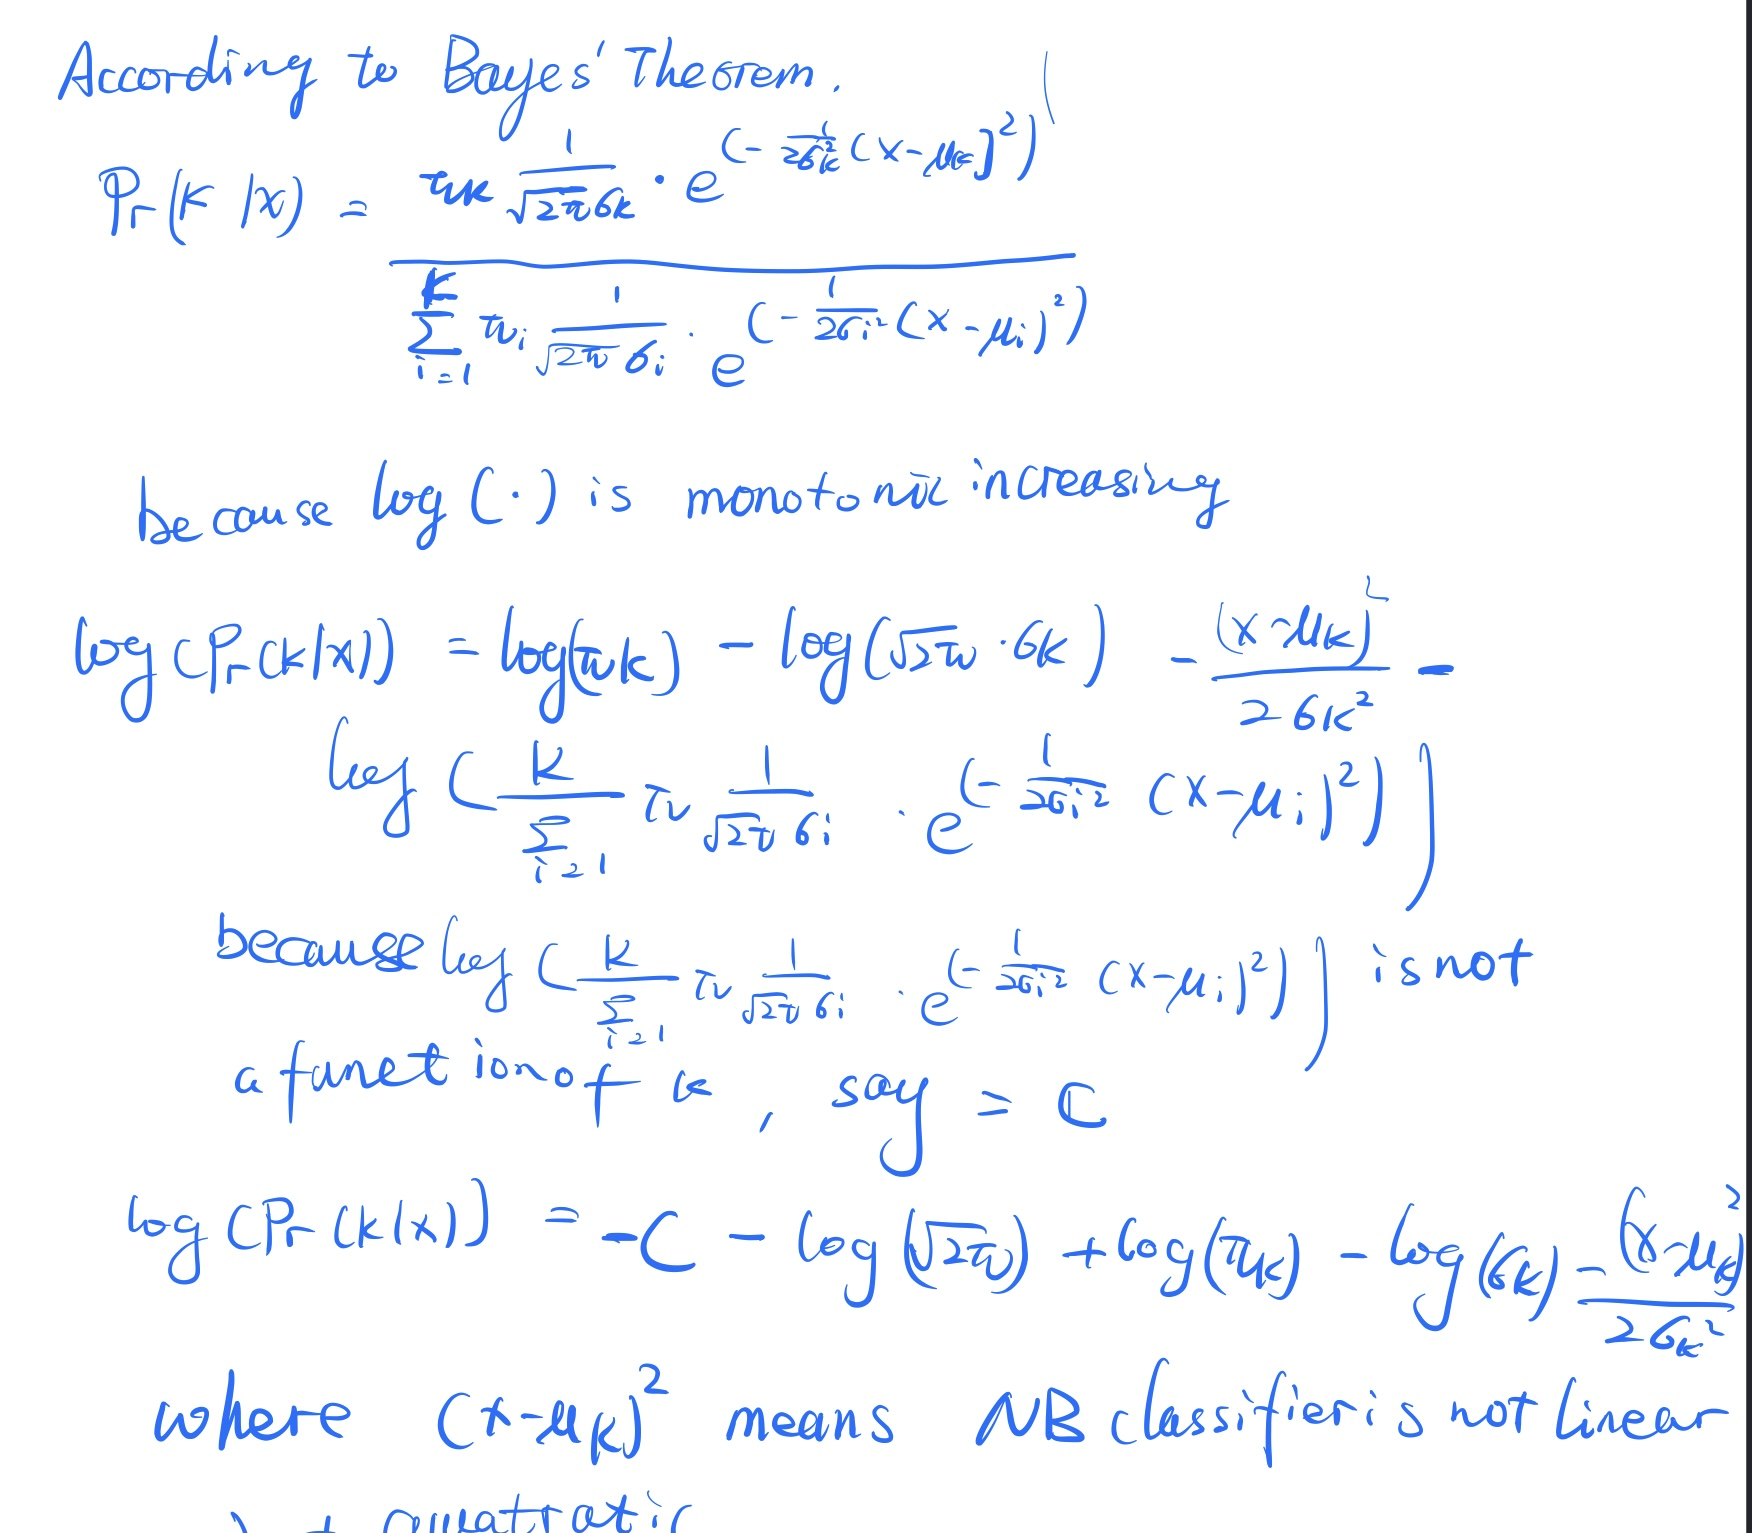


<center><font size="4"> 4. ISLR, 4.8.7 </font></center>

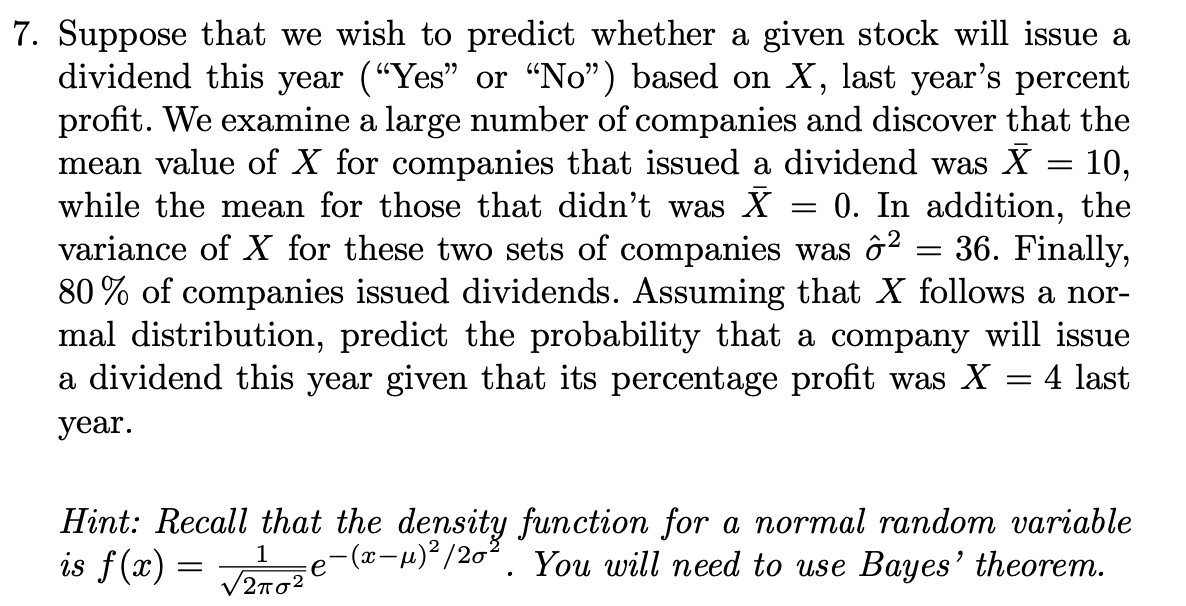

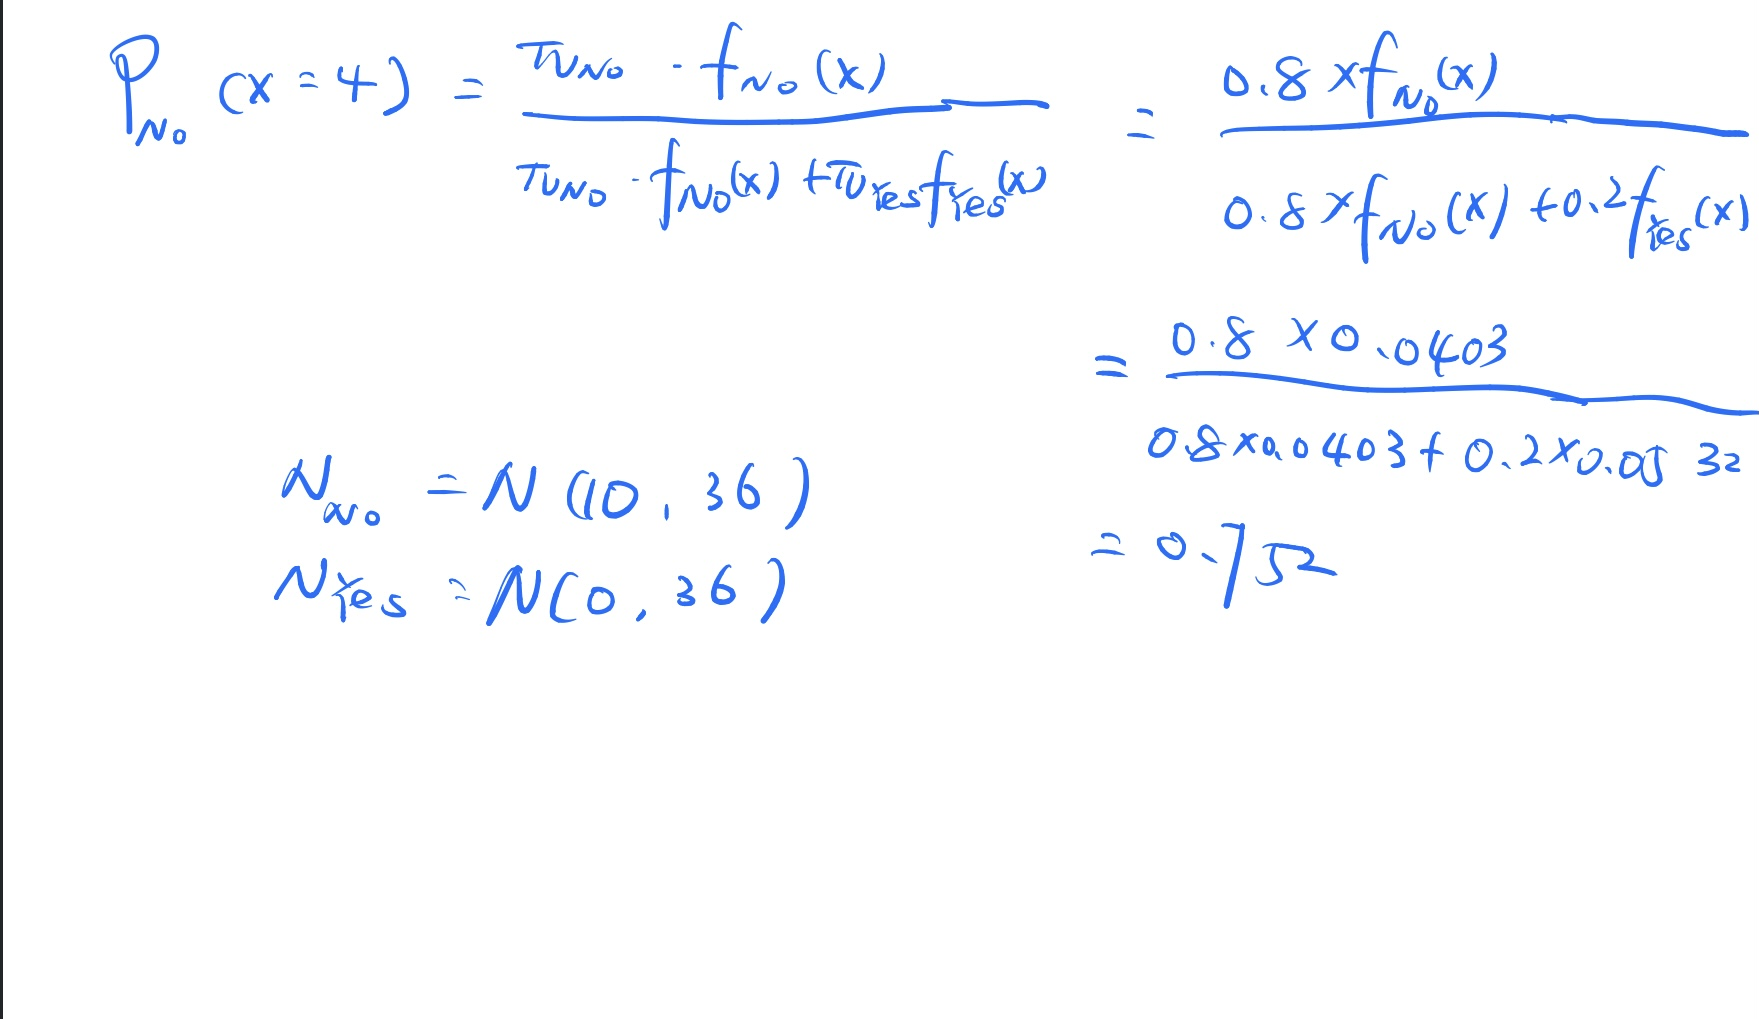